# Programming Project 1 
## 605.649 Introduction to Machine Learning
## Ricca Callis

## Directions


The purpose of this assignment is to give you an introduction to machine learning by implementing two
fairly simple learning algorithms. These two algorithms are called Winnow-2 (introduced in Module 01)
and Naïve Bayes (introduced in Module 02). For this assignment, you will use the following five datasets
that you will download from the UCI Machine Learning Repository, namely:

1. Breast Cancer
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from
Dr. William H. Wolberg.

2. Glass
https://archive.ics.uci.edu/ml/datasets/Glass+Identification
The study of classification of types of glass was motivated by criminological investigation.

3. Iris
https://archive.ics.uci.edu/ml/datasets/Iris
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

4. Soybean (small)
https://archive.ics.uci.edu/ml/datasets/Soybean+%28Small%29
A small subset of the original soybean database.

5. Vote — https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key
votes identified by the Congressional Quarterly Almanac.

### When using these data sets, be careful of some issues:


1. Not all of these data sets correspond to 2-class classification problems. For Naïve Bayes, that is not
really problem. But for Winnow-2, you will need to use one classifier for each class. To be fair in
comparing the two, you may want to generate Boolean classifiers for Naïve Bayes, even though this is
not strictly required.

2. Some of the data sets have missing attribute values. When this occurs in low numbers, you may simply
edit the corresponding values out of the data sets. For more occurrences, you should do some kind of
“data imputation” where, basically, you generate a value of some kind. This can be purely random, or
it can be sampled according to the conditional probability of the values occurring, given the underlying
class for that example. The choice is yours, but be sure to document your choice.

3. Most of attributes in the various data sets are either multi-value discrete (categorical) or real-valued.
You will need to deal with this in some way. For the multi-value situation, once again Naïve Bayes
should be fine, but Winnow-2 will have a problem. In that case, you can apply what is called “onehot
coding” where you create a separate Boolean attribute for each value. Again, I recommend you
go ahead and use this for Naïve Bayes, even though it is not really necessary. For the continuous
attributes, you will need to discretize them in some way for both algorithms and then proceed as in
the multi-valued categorical case.

### For this project, the following steps are required:

 Download the five (5) data sets from the UCI Machine Learning repository. You can find this repository
at http://archive.ics.uci.edu/ml/. All of the specific URLs are also provided above.
1

 Pre-process each data set as necessary to handle missing data and non-Boolean data (both classes and
attributes).

 Set up your test and training sets from the provided data. Specifically, split the data into two groups
randomly where 2/3 of the data will be used for training and 1/3 will be used for testing. If you
are more ambitious, you may set up a cross-validation experiment. In that case, I recommend either
10-fold cross-validation or 5 

 2 cross-validation. If you don’t know what this means, don’t worry
about it for now.

 Implement both Naïve Bayes and Winnow-2.

 Run your algorithms on each of the five the data sets. These runs should output the learned models
in a way that can be interpreted by a human, and they should output the classifications on all of the
test examples. If you are doing cross-validation, just output classifications for one fold each.

 Write a very brief paper that incorporates the following elements, summarizing the results of your
experiments. You should also output the summary statistics on classification accuracy.
1. Title and author name
2. A brief, one paragraph abstract summarizing the results of the experiments
3. Problem statement, including hypothesis, projecting how you expect each algorithm to perform
4. Brief description of algorithms implemented
5. Brief description of your experimental approach
6. Presentation of the results of your experiments
7. A discussion of the behavior of your algorithms, combined with any conclusions you can draw
8. Summary
9. References (you should have at least one reference related to each of the algorithms implemented,a reference to the data sources, and any other references you consider to be relevant)

 Submit your fully documented code, the outputs from running your programs, and your paper. Your
grade will be broken down as follows:
– Code structure – 10%
– Code documentation/commenting – 10%
– Proper functioning of your code, as illustrated by a 5 minute video – 30%
– Summary paper – 50%


In [1]:
# Author: Ricca Callis
# EN 605.649 Introduction to Machine Learning
# Programming Project #1
# Date Created: 6/8/2020
# File name: Programming Assignment 1 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Implementation of Winnow-2 and Naive Bayes Supervised Machine Learning algorithms 
# using 5 datasets from the UCI Machine Learning Repository

"""
Winnow-2: Used for 2-class classification problems (e.g., cancer/not-cancer). Learner receives 
a data instance (a vector boolean attribute) and then makes a prediction for the data instance 
by assigning a label of 0 (doesn't belong) or 1 (does belong). Then, the learner is told whether 
the prediction is accurate. 
"""

"""
Naive Bayes: Used for 2-class classification problems (e.g., cancer/not-cancer). Is a probabilistic 
classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting.
"""

""" 
Required Data Sets:
    breast-cancer-wisconsin.data.csv
    breast-cancer-wisconsin.names
    glass.data
    glass.names
    house-votes-84.data
    house-votes-84.names
    iris.data
    iris.names
    soybean-small.data
    soybean-small.names
""" 


' \nRequired Data Sets:\n    breast-cancer-wisconsin.data.csv\n    breast-cancer-wisconsin.names\n    glass.data\n    glass.names\n    house-votes-84.data\n    house-votes-84.names\n    iris.data\n    iris.names\n    soybean-small.data\n    soybean-small.names\n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [3]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random as py_random
import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from toolz import pipe # pass info from one process to another (one-way communication)
from typing import Callable
from collections import Counter, OrderedDict
import logging

logging.basicConfig ( filename ='logfile.txt' )
logging.root.setLevel ( logging.INFO )
logger = logging.getLogger ( __name__ )

In [4]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 1


In [6]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 1/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 1/input


In [7]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

breast-cancer-wisconsin.data.csv
breast-cancer-wisconsin.names.csv
glass.data.csv
glass.names.csv
house-votes-84.data.csv
house-votes-84.names.csv
iris.data.csv
iris.names.csv
naive-bayes-bool-glass-test.csv
naive-bayes-bool-house-votes-test.csv
naive-bayes-bool-soybean-test.csv
naive-bayes-boolean-cancer-test.csv
naive-bayes-boolean-iris-test.csv
naive-bayes-continuous-cancer-test.csv
naive-bayes-continuous-glass-test.csv
naive-bayes-continuous-house-votes-test.csv
naive-bayes-continuous-iris-test.csv
naive-bayes-continuous-soybean-test.csv
soybean-small.data.csv
soybean-small.names.csv
winnow2-cancer-test.csv
winnow2-glass-test.csv
winnow2-house-votes-test.csv
winnow2-iris-test.csv
winnow2-soybean-test.csv



# Supervised Learning

Goal: Make a prediction
   - Estimate a function f(x) so that y = f(x)
   
Where y can be:
   - Real Number: Regression
   - Categorical: Classification
   - Complex Object: Ranking # of items, parse tree, etc.
   
Data is labeled:
   - Data has many pairs { (x, y) }
       - x: Vector of binary, categorical, real valued features/attributes
       - y: class ( {+1, -1}, or a real number )
       
Method:
   - Create subsets of data:
       - Training Set
       - Testing Set
   - Estimate y = f(x) on X, Y
   - Assume the same f(x) generalizes (i.e., works on unseen X', Y')
   
   
# Linear Models for Classification

## Binary Classification

Decision boundary is linear
$$f(x) =  \begin{bmatrix}+1 & if w_{1}x_{1}+w_{2}x_{2}+...+w_{d}x_{d} \ge \theta \\-1 & otherwise \end{bmatrix}$$

### Input

Vectors $x^{i}$
    - Inputs to the model are feature (or attribute) values

Each feature has a weight $w_{i}$

Class Labels $y^{j}$

### Goal

The model must learn how to map specific examples to class labels, or y = x(x) in a way that minimizes the error of misclassification

Find vector $w = (w_{1}, w_{2}, ... , w_{d})$

# Winnow-2

**Online Supervised Learning Algorithm**

Can adjust to changing target, over time

**Overview:**
    - Learner (prediction model) receives a data instance
            - Attribute values must be binary (must use one-hot encoding)
    - Learner makes a prediction of the class to which the data instance belongs by assigning a label:
            - Learner predicts 0 if data instance doesn't belong to class (benign)
            - Learner predicts 1 if data instance does belong to class (malignant)
    - Learner is told whether the prediction is accurate 
            - If prediction was correct: Nothing happens
            - If prediction was incorrect: Learning occurs (i.e., amending the mathematical model)
           

### Learner Receives Data Instance (Prediction Model)

**Assume x is a real-valued feature vector**, $\left||x|\right|_{2} = 1$


**Takes the weighted sum over the dimensions of each of the attributes**

$$f(x)=\sum_{i=1}^{d} w_{i}x_{i}$$

where,

 d is the total number of attributes

$\ w_{i}$ is the weighting of the ith attribute

$\ x_{i}$ is the value of the ith attribute in binary format

 f(x) is the weighted sum (e.g., $\ w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + …. + w_{d}x_{d}$)

### Learner Makes a Prediction

**Prediction:** $h(x) = +1 iff (w * x) \ge \theta$

**Threshold:** $\theta$
    - Commonly set to 0.5

**Weight Vector**
Initially, all the weights $\ w_{i}$ for each attribute are set to 1

**Initialize:** 

$\theta = \frac{d}{2}$

$w = \frac{1}{d}, ... ,\frac {1}{d}$

*Weight Vector*: Initially, all the weights $\ w_{i}$ for each attribute are set to 1

**For every training example $x^{(t)}$, compute:**

$y^{'}= f (x^{t})$

**Prediction Decision:**
$h(x) =  \begin{bmatrix}1 & f(x)>\theta \\0 & otherwise \end{bmatrix}$

### Learner Is Told Whether Prediction Is Accurate

**Learning**

i.e., if no mistake: $(y^{t} = y^{'})$

i.e., if mistake: 
$\ w_{i}$ <-- $\ w_{i}$ * ($\exp^{ny}{x_{i}^{t}}$ \ $\ (Z^{t}))$

Because we are updating multiplicatively, all weights remain positive
    - In order to predict positive there must be “enough” evidence
    - Thus we make more progress when we make a mistake.
    
**Adjustment Constant for Promotion & Demotion**
$\alpha$ =2

**There are two types of incorrect predictions:**

    ```
    | Learner's Prediction |   Correct Class    | Failure Called | Learning Type |
    |----------------------|--------------------|----------------|---------------|
    | 0 (does not belong)  | 1 (does belong)    | False Negative |   Promotion   |
    | 1 (ddoes belong)     | 0 (does not belong)| False Positive |   Demotion    |
    ```

**Promotion**
    - Learner's Prediction: 0 (does not belong)
    - Correct Class: 1 (does belong)
    - Update Action Taken: (learning = promotion)
$w_{i} = \begin{bmatrix} \alpha * w_{i} & if x_{i}=1 \end{bmatrix}$


**Demotion**
    - Learner's Prediction: 1 (does belong)
    - Correct Class: 0 (does not belong)
    - Update Action Taken: (learning = demotion)
$w_{i} = \begin{bmatrix} \frac {w_{i}} {\alpha} & if x_{i}=1 \end{bmatrix}$


### Proceed Row-by-Row 

Continue row-by-row through the original data set (one instance at a time)

### Advantages
    - Simple
    - Guaranteed to learn a linearly separable problem
    - Suitable for problems with many irrelevant attributes
    
### Limitations
    - Only linearly separable problems
    - Only converges for linearly separable data
    - Not really efficient with many features

In [8]:
# Implementation of the Winnow-2 Algorithm

'''''
Class: Winnow2
    - Supervised Learning Algorithm for 2-class classification problems.Learner receives 
    a data instance (a vector boolean attribute) and then makes a prediction for the data instance 
    by assigning a label of 0 (doesn't belong) or 1 (does belong). Then, the learner is told whether 
    the prediction is accurate. 

Functions:
    - __init__: Initializes the Winnow2 algorithm 
    - predict_probability: Function gets the nonbinary prediction probability
    - binary_prediction: Function gets the binary prediction
    - adjust_weights: Function adjusts the weights of each attribute
    - promote_weights: If learner predicts 0 when class is 1, then for all x_{i} = 1, w_{i}*weight_scaler_alpha.
    - demote_weights: If learner predicts 1 when class i 0, then for all x_{i} = 0, w_{i}/weight_scaler_alpha
    - run_training_prediction: Runs a single instance of Winnow-2 prediction
    - fit: Fits model f(x) = Sum(w_{i}*x_{i}) by predicting class label (1 = belongs; 0 = otherwise) 
    if model > threshold_theta.
'''''
class Winnow2:
    def __init__(
        # Initialize parameters
        self, # class instance
        weight_scaler_alpha: float, # 2
        threshold_theta: float,
        number_of_features_d: int,
        verbose: bool = True, # binary
    ):
        # Initialize class instances
        self.weight_scaler_alpha = weight_scaler_alpha
        self.threshold_theta = threshold_theta
        self.number_of_features_d = number_of_features_d
        # Weight vector: Each attribute's weight is initialized to 1
        # Create an array of given shape and data type, where the element's value is set to 1
        # Array shape = d (number of features); data type = integers
        self.weights = np.ones ( ( number_of_features_d, ) )
        self.verbose = verbose

    def predict_probability ( self, X: np.array ):
        """
        Function to get the nonbinary probability P(h(x_{i})= w_{i} * d 
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
            Returns: X @ self.weights (integer)
        """
        return X @ self.weights

    def binary_prediction ( self, X: np.array ):
        """
        Function to get the binary prediction value. Where h(x) = 1 if P(h(x_{i}) >= theta or 0 otherwise
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
            Returns: X @ self.weights (integer)      
        """
        return self.predict_probability ( X ) > self.threshold_theta

    def adjust_weights ( self, X: np.array, scale_func: Callable ):
        """
        Function to either promote or demote, based on whether division or
        multiplication is passed as the scaling function.
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
                scale_func: Callable. Indicates scale function. 
                    If learner needs to promote, then for all x{i} = 1, w_{i}*alpha
                    If learner needs to demote, then for all x{i} = 1, w_{i}/alpha
            Returns: new_weights. Indicates an array of new weights for each attribute 
        """
        # Adjust weight of attribute
        # Confirm observation x{i} is in the array
        if isinstance ( X, list ):
            X = np.array ( X )
        # Confirm observation x{i} is boolean/binary
        if self.verbose:
            # Log Changes: Create a list of initial weights; Denote training instance for observation x_{i} 
            logger.info ( f"Initial weights: { self.weights }" )
            logger.info ( f"Training instance: { X }" )

        # Modify weights for attribute who has a value of 1
        new_weights = np.where ( X == 1, scale_func ( self.weights, self.weight_scaler_alpha ), self.weights )

        # Confirm observation x{i} is boolean/binary
        if self.verbose:
            # Log changes: Create a list of updated weights
            logger.info ( f"Updated weights: { new_weights } " )

        # Return new weighted values for each attribute
        return new_weights

    def promote_weights ( self, X: np.array ):
        """
        Function promotes attribute weights.If learner made an inaccurate prediction (prediction was 0 when 
        correct class was 1), then it must modify weights for attributes who have a value of 1 by multiplying
        the current weight by alpha. Specifically, if prediction = 0 and class = 1, then for all x{i} = 1,
        w_{i}*weight_scaler_alpha
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
            Returns: self.adjust_weights
        """
        # Confirm observation x{i} is boolean/binary
        if self.verbose:
            # Log changes: Promotion means multiplying weights by alpha
            logger.info ( "Promoting weights: for all x{i} = 1, w_{i}*alpha" )
        # Return adjusted weights (promotion: weight_{i} * alpha)
        return self.adjust_weights ( X = X, scale_func = np.multiply )

    def demote_weights ( self, X: np.array ):
        """
        Function demotes attribute weights. If learner made an inaccurate prediction (prediction was 1 when 
        correct class was 0), then it must modify weights for attributes who have a value of 1 by dividing
        the current weight by alpha. Specifically, if prediction = 1 and class = 0, then for all x{i} = 1,
        w_{i}/weight_scaler_alpha
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
            Returns: self.adjust_weights
        """
        # Confirm observation x{i} is boolean/binary
        if self.verbose:
            # Log changes: Demotion means multiplying weights by alpha
            logger.info ( "Demoting weights: for all x{i} = 1, w_{i}/alpha" )
        # Return adjusted weights (demotion: weight_{i} / alpha)
        return self.adjust_weights ( X = X, scale_func = np.true_divide )

    def run_training_prediction ( self, X: np.array, y: bool ):
        """
        Runs a single Winnow-2 training prediction iteration.
            yhat: Learner's Boolean class prediction, given the data observation x_{i}. 
                Assigned 1 if predicting it belongs to class label; 0 otherwise
            Parameters:
                self: Indicates class instance
                X: np.arry : Indicates array of data instances x_{i}
                y: bool . Class prediction (y) must be boolean/binary
            Returns:
                If correct prediction, then yhat == y, & nothing happens
                If incorrect prediction, then yhat != y & adjust weights
                    Promote Weights if yhat = 0 & y = 1
                    Demote weights if yhat = 1 & y = 0                 
        """
        # Learner's Boolean class prediction, given the data observation x_{i}. 
        # Assigned 1 if predicting it belongs to class label; 0 otherwise
        yhat = self.binary_prediction ( X )
        
        # Confirm observation x{i} is boolean/binary
        if self.verbose:
            # Log actual class labels {y} and predicted class labels {yhat}
            logger.info ( f"Actual: { y } Prediction: { yhat }" )

        # If prediction is correct, do nothing
        if yhat == y:

            return

        # If prediction is 0 and y is 1, promote
        if not yhat and y:
            self.weights = self.promote_weights ( X )
            return

        # If prediction is 1 and y is 0, demote
        self.weights = self.demote_weights ( X )
        return

    def fit ( self, X, y ):
        """
        Fits model f(x) = Sum(w_{i}*x_{i}) by predicting class label (1 = belongs; 0 = otherwise) 
        if model > threshold_theta.
            Parameters:
                self: Indicates class instance
                X: Indicates array of data instances x_{i}
                y: Class prediction (y) must be boolean/binary                 
        """
        for X_instance, y_instance in zip ( X, y ):
            self.run_training_prediction ( X_instance, y_instance )

# Naive Bayes

**Online Supervised Learning Algorithm**

Seek the best class that matches the features of the data.

Provides a probabilistic model: we are interested in estimating the conditional probability of the class label, given the observation.

**Overview:**

Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. 

"Naive" Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Bayes’ Theorem provides a way to calculate the probability of a piece of data belonging to a given class, given our prior knowledge:

$$P(Class|Data) = \frac{P(Data|Class)P(Class)}{P(Data)}$$

Where, 
    P(Class): Prior Probability
    
    P(Class|Data): Posterior Probability is the conditional probability of the class given the provided data
    
    P(Data|Class): Likelihoods (or base rates)
    
    P(Data): Total probability; Used as a constant to normalize the result
    

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.
    - The conditional probability of all variables given the class label is changed into separate conditional probabilities of each variable value given the class label
    - These independent conditional variables are then multiplied together

    
$P(y_{i} | x_{1}, x_{2}, …, x_{i}) = P(x_{1}, x_{2}, …, x_{i} | y_{i}) * P(y_{i})$
    
then becomes:
   
$P(y_{i} | x_{1}, x_{2}, …, x_{i}) = P(x_{1}|y_{i}) * P(x_{2}|y_{i}) * … P(x_{n}|y_{i}) * P(y_{i})$

where,

$ class label = y_{i} $

$ attribute observation = x_{i}$


*Avoiding Numerical Underflow with Log*

The calculation of the independent conditional probability for one example for one class label involves multiplying many probabilities together, one for the class and one for each input variable. As such, the multiplication of many small numbers together can become numerically unstable, especially as the number of input variables increases.

To overcome this problem, it is common to change the calculation from the product of probabilities to the sum of log probabilities. For example:

$P(y_{i} | x_{1}, x_{2}, …, x_{i}) = log(P(x_{1}|y_{i})) + log(P(x_{2}|y_{i})) + … + log(P(x_{n}|y_{i})) + log(P(y_{i}))$


Effect: Creates larger (negative) numbers and adding the numbers together will mean that larger probabilities will be closer to zero. The resulting values can still be compared and maximized to give the most likely class label.


**Decision Rule**

Conditional probability calculation is performed for each of the class labels.

*Maximum A Posteriori (MAP):* The label with the largest probability is selected as the classification for the given instance. 

### Calculating Prior Probabilities

Prior Probability = P(Class) = $P(y_{i})$

To calculate,

$P(y_{i})$ = $\frac {\sum count of observations with y_{i}} {total number of observations}$

### Calculating Conditional Posterior Probabilities

The conditional probability for a feature value given the class label is estimated from the data. 
    - Includes data observations that belong to a given class, and one data distribution per variable. 
    - If there are K classes and n variables, then k * n different probability distributions must be created and maintained.
    
    
**Data Types**

Depending on data type (of each feature), may need to estimate the parameters of one of three standard probability distributions:

1. Binary Data: Binomial Distribution
2. Categoriocal Data: Multinomial Distribution
3. Numeric Data: Gaussian Distribution


## Naive Bayes Algorithm Steps

1. Create Train & Test Subsets
2. Training Data: Separate By Class
    - Separate training data by class
    - Calculate Prior Probability or base rate: P(Class)
3. Training Data: Summarize Dataset
    - Calculate mean for each attribute and class
    - Calculate standard deviation of each attribute
    - Explore other EDA
4. Training Data: Summarize Data By Class
    - Calculate likelihoods: P(Data|Class). Conditional probabilities for each of the features
    - Calculate mean for each attribute by class
    - Calculate standard deviation for each attribute by class
5. Training Data: Binomial, Gaussian, Multinomial Probability Density Function.
    - Calculate probability density function
6. Testing Data: Class Predictions P(Class|Data)
    - Calculate probability that data belongs to first class: 
    $P(class_{1}|data) = P(x_{i}|class_{1}) * P(class_{1})$
    - Calculate probability that data belongs to second class:
    $P(class_{0}|data) = P(x_{i}|class_{0}) * P(class_{0})$
    - Value is maximized:the calculation for the class that results in the largest value is taken as the prediction
    - Add additional column to testing set
    N + 1: Predicted Class
7. Assess whether prediction was correct
    - Add additional column to testing set
    N + 2: Prediction Correct? (1 if yes, 0 if no)



In [9]:
# Implementation of Naive Bayes

'''''
Class: NaiveBayes
    - Supervised Learning Algorithm for 2-class classification problems.Is a probabilistic 
    classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting.

Functions:
    - __init__: Initializes the NaiveBayes algorithm 
    - fit_gaussian: Fits classes to a Guassian (normal) distribution
    - fit_multinomial: Fits classes to a multinomial distribution
    - fit: Fits classification model (either guassian or multinomial) and calculates prior
    - predict_one_class: Predicts value for one class
    - predict_prob: Predicts probability for each row
    - binary_prediction:Class prediction (argmax across classes)
    

'''''

class NaiveBayes:
    def __init__(
        # Initialize parameters
        self,# class instance
        column_distribution_map: dict, # maps column to guassian or multinomial
        alpha: float = 1, # smoothing parameter alpha for multinomial
        binomial: bool = False,
        verbose: bool = True,
    ):
        # Initialize class instances
        self.binomial = binomial
        self.column_distribution_map = column_distribution_map
        self.fitted_distributions = {}
        self.is_fitted = False
        self.alpha = alpha
        self.verbose = verbose

    def _fit_gaussian ( self, X, column_index, y ):
        
        """
        Fits classwise Gaussian distributions to `X[:, column_index]` using the sample parameter MLEs.
            Parameters
                X : np.ndarray. Indicates matrix of X features.
                column_index : Indicates the column index for the Gaussian fit (Type: Int)
                y : np.ndarray. Indicates vector of y target classes
            Returns: gaussian_fits
        """
        
        # Dictionary to map each value in `y` to a Gaussian.
        gaussian_fits = {
            val: stats.norm (
                loc = X [ y == val, column_index ].mean(),  # Class sample mean
                scale = max ( X [ y == val, column_index ].std(), 0.00001 ),  # Class sample std
            )
            for val in sorted ( set ( y ) )
        }
        
        if self.verbose:
            # Log
            logger.info ( f"Fitted Gaussians for column { column_index } " )
            for k, v in gaussian_fits.items():
                logger.info (
                    f"Class: { k } Mean: { np.round ( v.mean(), 2 ) } Std: { np.round ( v.std(), 2 ) } "
                )

        return gaussian_fits

    def _fit_multinomial (self, X, column_index, y ):
        """
        Fits classwise multinomial distributions to `X[:, col_idx]`using the sample parameter MLEs.
            Parameters
                X : np.ndarray. Indicates matrix of X features.
                column_index : Indicates the column index for the multinomial fit (Type: Int)
                y : np.ndarray Indicates the vector of y target classes
            Returns: fitted_distributions
        """
        fitted_distributions = {}
        all_X_values = list ( range ( int ( X [:, column_index ].max() ) + 1 ) )
        # For each class...
        for val in sorted ( set ( y ) ):
            n = np.sum ( y == val )  # Number of instances in the class
            relevant_subset = X [ y == val, column_index ]  # Rows in X belonging to class
            value_counts = Counter ( relevant_subset )  # Counts of the values in X in the class
            all_x_value_counts_smoothed = OrderedDict (
                {
                    x_val: self.alpha  # Just alpha if no values
                    if x_val not in value_counts
                    else value_counts [ x_val ]
                    + self.alpha  # Alpha + Num value occurences otherwise
                    for x_val in all_X_values  # Across the values in the column of X
                }
            )
            
            # n + Alpha * m
            normalizer = n + self.alpha * len ( all_X_values )

            # Create the distribution for each class
            fitted_distributions [ val ] = stats.multinomial (
                n = n, p = np.array ( list ( all_x_value_counts_smoothed.values() ) ) / normalizer
            )

        if self.verbose:
            # Log
            logger.info ( f"Fitted multinomials for column { column_index } " )
            for k, v in fitted_distributions.items():
                logger.info ( f"Class: { k } p: { np.round ( v.p, 2 ) } " )
        
        return fitted_distributions

    def fit ( self, X: np.ndarray, y: np.ndarray ):
        """
        Fits the Native Bayes classifier across all classes.
            Parameters
                X : np.ndarray. Indicates matrix of X features.
                col_idx : Indicates the column index for the multinomial fit (Type: Int)
                y : np.ndarray Indicates the vector of y target classes
            Returns: N/A
        """

        # For each feature column index in X
        for column_index in range ( X.shape [ 1 ] ):
            if column_index not in self.column_distribution_map:
                raise ValueError ( f"No distribution given for column { column_index } " )

            # If the column has a multinomial tag, fit a multinomial.
            if self.column_distribution_map [ column_index ] == "multinomial":
                self.fitted_distributions [ column_index ] = self._fit_multinomial (
                    X = X, column_index = column_index, y = y
                )
            # Otherwise fit a Gaussian
            elif self.column_distribution_map [ column_index ] == "gaussian":
                self.fitted_distributions [ column_index ] = self._fit_gaussian (
                    X = X, column_index = column_index, y = y
                )

        self.is_fitted = True
        # The prior P(C) gets set to multinomial with p as the
        # proportion of observations in each class C
        self.prior = stats.multinomial (
            n = len ( y ), p = [ np.sum ( y == val ) / len ( y ) for val in sorted ( set ( y ) ) ]
        )

    def _predict_one_class ( self, X: np.ndarray, class_index: int ):
        
        """
        Generates the prediction value for one class.
            Parameters:
                X : np.ndarray Indicates the matrix of X features
                class_index : int Indicates the class index for the prediction value
           Return: Array of predictions across features for a given class
        """
        return (
            np.array (
                [
                    self.fitted_distributions [ column_index ][ class_index ].pdf (
                        X [ :, column_index ]
                    )  # get PDF if Gaussian
                    if self.column_distribution_map [ column_index ] == "gaussian"
                    else self.fitted_distributions [ column_index ][ class_index ].p [
                        X [ :, column_index ].astype ( "int" )  # get p if multinomial
                    ]
                    for column_index in range ( X.shape [ 1 ] )  # For each column in X
                ]
            ).prod ( axis = 0 )
            * self.prior.p [ class_index ]
        )

    def predict_probability ( self, X ):
        """
        Get the prediction probability for each row in X, for each class in y.
        """
        if not self.is_fitted:
            raise ValueError ( "Must fit model before predictions can be made" )

        return pipe (
            [
                self._predict_one_class (
                    X = X, class_index = class_index
                )  # Get one class prediction
                for class_index in self.fitted_distributions [ 0 ].keys()  # For each class
            ],
            np.vstack,  # Create a matrix where each row is prob of column being class
            # If self.binomial, return prob of C == 1, else return all rows.
            # Primarily for the multiclass classifier class.
            lambda arr: arr [ 1 ] if self.binomial else arr,
        )

    def binary_prediction ( self, X ):
        # Get the class prediction (argmax across classes)
        return np.argmax ( self.predict_probability ( X ), axis = 0 )

# Classification Metrics

Loss functions are used by algorithms to learn the classification models from the data.

Classification metrics, however, evaluate the classification models themselves. 

For a binary classification task, where "1" is taken to mean "positive" or "in the class" and "0" is taken to be "negative" or "not in the class", the cases are:

1. The true class can be "1" and the model can predict "1". This is a *true positive* or TP.
2. The true class can be "1" and the model can predict "0". This is a *false negative* or FN.
3. The true class can be "0" and the model can predict "1". This is a *false positive* or FP.
4. The true class can be "0" and the model can predict "0". This is a *true negative* or TN.


## Cross Validation

Fundamental assumption of machine learning:The data that you train your model on must come from the same distribution as the data you hope to apply the model to.

Options:
    - Divide your data into two sets:
        1. The training set which you use to build the model
        2. The test(ing) set which you use to evaluate the model. 
    - kfolds: Yields multiple estimates of evaluation metric
    
### kfold Cross Validation

Looks like:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Test** | Train | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| **Test** | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | **Test** | Train | Train | Train | Train | Train | Train | Train |

And finally:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | Train | Train | Train | Train | Train | Train | Train | **Test** |


In [10]:
# Helper Functions

# Set seed
def set_seed ( seed ):
    np.random.seed ( seed )
    random.seed ( seed )
    
# Model Building
# Supervised Learning: 2-Class Classification

# Discrete Variables
# Requires Binary/Boolean Variables
# Must Create Dummy Variables (via One-Hot Encoding)

def discretize_dataframe ( df: pd.DataFrame, discretize_boundries: dict ):
    # Each column is a discrete bin
    df = df.assign ( ** { col: pd.cut ( df [ col ], bins = boundaries )
            for col, boundaries in discretize_boundries.items() } ) 
    # Get dummy variables for class label
    return pd.get_dummies ( data = df, columns = [ c for c in df.columns if "class" not in c ], drop_first = True )

# Classification Metrics
# Confusion Matrix
def confusion_matrix ( actuals, predictions ):
    
    """
    Function to find the confusin matrix for a classifier
        Parameters:
            actuals: Indicates actual y values
            predictions: Indicates yhat (predicted y values)
        Returns: Dataframe with Actual Class Values & Predicted Class Values for each feature
    """
    
    # Get all the class values
    actual_values = np.sort ( np.unique ( actuals ) )

    # Get the dataframe where columns are y and rows are yhat
    return pd.DataFrame (
        { y: [ np.sum ( ( actuals == y ) & ( predictions == yhat ) ) for yhat in actual_values ]
            for y in actual_values }
        ,index = actual_values )

# Cross Validation
# kFolds
class KFoldCV:
    """
    Class to handle KFold Cross Validation
        Parameters
            number_of_folds : Indicates the number of folds or splits (Type: Integer)
            shuffle : If True, rows will be shuffled before the split (Type: Boolean)
    """

    def __init__( self, number_of_folds: int, shuffle: bool = True ):
 
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def get_indices ( self, X ):
        # Get indices of length rows of X
        # Shuffle if `self.shuffle` is true.
        nrows = X.shape [ 0 ]
        return (
            np.random.permutation (
                np.arange ( nrows )
            )  # Shuffle the rows if `self.shuffle`
            if self.shuffle
            else np.arange ( nrows )
        )

    def _get_one_split ( split_indices, number_of_split ):
        # Given the split indices, get the `number_of_split` element of the indices.
        return ( np.delete ( np.concatenate ( split_indices ), split_indices [ number_of_split ] ),  # Drops the test from the train
            split_indices [ number_of_split ],)  # Gets the train

    def _get_indices_split ( indices, number_of_folds ):
        # Split the indicies by the number of folds
        return np.array_split ( indices, indices_or_sections = number_of_folds )

    def split ( self, X: np.ndarray ):
        # Creates a generator of train test splits from a matrix X
        # Split the indices into `number_of_folds` subarray
        indices = self.get_indices ( X )
        split_indices = KFoldCV._get_indices_split ( indices = indices, number_of_folds = self.number_of_folds )
        for number_of_split in range ( self.number_of_folds ):
            # Return all but one split as train, and one split as test
            yield KFoldCV._get_one_split ( split_indices, number_of_split = number_of_split )

class MulticlassClassifier:
    """
    Class to do one vs. rest multiclass classification using Boolean output classifier.
        Parameters
            model_class : Indicates a callable that returns the model object to use in fitting (Type: Callable).
            classes : np.ndarray Indicates an array containing the values in `y` (which are uysed to create a classifier).
            class_kwargs : A dictionary of args for `model_class` mapping the class value to a dictionary of kwargs. (Type: Dictionary)
    """

    def __init__(self, model_class: Callable, classes: np.ndarray, class_kwargs):
        self.classes = classes
        # Create the models (mapping from class to model)
        self.models = {
            element: model_class ( ** class_kwargs.get ( element ) ) for element in self.classes
        }

    @staticmethod
    def _get_y_binary ( y, cls ):
        # Transform multivalued outputs into one vs. rest booleans
        # where `cls` is the value of 1.
        return np.where ( y == cls, 1, 0 )

    def fit ( self, X, y ):
        """
        Fit the classifiers across all the models.
        """
        if set ( y ) - set ( self.classes ):
            raise ValueError ( "y contains elements not in `classes`" )

        for cls, model in self.models.items():
            # Create the binary response for `cls`
            y_binary = MulticlassClassifier._get_y_binary ( y, cls )
            # Fit the the model for that class.
            model.fit ( X, y_binary )

    def binary_prediction ( self, X ):
        """
        Gets the highest probability class
        """
        # Get the prediction_prob across all the classes.
        predictions = { cls: model.predict_probability(X) for cls, model in self.models.items()}

        # Get the class corresponding to the largest probability.
        return [
            max ( predictions.keys(), key = lambda x: predictions [ x ] [ prediction ] )
            for prediction in range ( X.shape [ 0 ] )
        ]
            
def fit_predict_kfold ( model_object, X, y, kfold, randomseed = None, filename = None ):
    # Set seed
    if randomseed:
        np.random.seed ( randomseed )
    
    # Initialize metric measurements
    true_positive = 0
    true_negative = 0
    false_negative = 0
    false_positive = 0

    logger.setLevel ( logging.CRITICAL )
    # Initialize iteration counter to 0
    iteration = 0
    
    # Iterate through splits
    for train, test in kfold.split ( X = X ):
        iteration += 1

        if iteration == kfold.number_of_folds:
            logger.setLevel ( logging.INFO )

        # Fit model
        model_object.fit ( X [ train, : ], y [ train ] )
        
        # Make predictions on test set
        predicted = model_object.binary_prediction ( X [ test, : ] )
        actuals = y [ test ] 
        
        # Log confusion matrix for last fold
        if iteration == kfold.number_of_folds:
            logger.info ( confusion_matrix ( actuals = actuals, predictions = predicted ) )
            
            # Write to file
            if filename:
                # Write predictions to file if given filename
                pd.DataFrame ( np.hstack ([ X [ test ],np.array( model_object.binary_prediction ( X [ test ] ) ).reshape ( -1, 1 ),np.array ( y [ test ] ).reshape( -1, 1 ) ] ),
                    columns = [ f"X_{ idx }" for idx in range ( X.shape [ 1 ] ) ]
                    + [ "Predictions", "Actuals" ] ).to_csv (filename, index = False )

#ETL, EDA

# Correlations
def correlations ( data, y, xs ):
    rs = [] # pearson's r
    rhos = [] # rho
    for x in xs:
        r = stats.pearsonr ( data [ y ], data [ x ] ) [ 0 ]
        rs.append ( r )
        rho = stats.spearmanr ( data [ y ], data [ x ] ) [ 0 ]
        rhos.append ( rho )
    return pd.DataFrame ( { "feature": xs, "r": rs, "rho": rhos } )

# Pair-wise Comparisons

def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

# Breast Cancer Data Set
## Extract, Transform, Load: Breast Cancer Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

### Attribute Information: 10 Attributes (d)

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10

### One Class Label
11. Class: (2 for benign, 4 for malignant)

In [11]:
# Log ETL: Breast Cancer Data
logger.info ( "ETL: Breast Cancer Data Set" )

# Read Breast Cancer Data
cancer_data = (
    pd.read_csv(
        "breast-cancer-wisconsin.data.csv",
        header = None,
        #Assign labels to columns
        names = [
            "id_number",
            "clump_thickness",
            "uniformity_cell_size",
            "uniformity_cell_shape",
            "marginal_adhesion",
            "single_epithelial_cell_size",
            "bare_nuclei",
            "bland_chromatin",
            "normal_nucleoli",
            "mitosis",
            "class",
        ],
    )
    .replace ("?", np.NaN) # Remove all instances with "?"
    .dropna ( axis = 0, how = "any" ) # Delete all NaN
    .astype ( "int" ) # Assign all values as type: integer
)

In [12]:
# Verify whether any values are null
cancer_data.isnull().values.any()

False

**Notes**

There are no missing values

In [13]:
# Again
cancer_data.isna().any()

id_number                      False
clump_thickness                False
uniformity_cell_size           False
uniformity_cell_shape          False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitosis                        False
class                          False
dtype: bool

In [14]:
# Confirm data was properly read by examining data frame
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id_number                      683 non-null int64
clump_thickness                683 non-null int64
uniformity_cell_size           683 non-null int64
uniformity_cell_shape          683 non-null int64
marginal_adhesion              683 non-null int64
single_epithelial_cell_size    683 non-null int64
bare_nuclei                    683 non-null int64
bland_chromatin                683 non-null int64
normal_nucleoli                683 non-null int64
mitosis                        683 non-null int64
class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


**Notes** 

As expected, Dataframe shows us we have 698 total observations & 11 columns (or, 11 variables). Each variable has 698 observations, so we know we have no missing data. 

We see that all columns are integers, just as we want it

In [15]:
# Look at first few rows of dataframe
cancer_data.head()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**Notes**

For Winnow-2, 
   - 2-class classification is accomplished using vector boolean attributes
   - Thus,we know the required data set must list numerical attributes (in binary):


    ```
    | Columns         | 0 through N                   |
    |-----------------|-------------------------------|
    | Instance ID     | Cant use for classification   |
    | Attribute 1     | Binary                        |
    | Attribute 2     | Binary                        |
    | Attribute 3     | Binary                        |
    | .               | .                             |
    | .               | .                             |
    | .               | .                             |
    | N: Actual Class | Binary                        |
    ```
    
   - We'll need to make all attributes boolean/binary via one-hot encoding (or dummy variables)
   - We'll need to make class a boolean category. Currently, class is coded as:
   2: Benign
   4: Malignant


In [16]:
# Drop id_number from cancer data set
cancer_data.drop ( [ 'id_number' ], axis = 'columns', inplace = True )
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [17]:
# Map Current class values
# Now, 2 = Nonmembership (benign); 4 = Membership (malignant)
# We want 2 = 0 and 4 = 1
cancer_data [ 'class' ]= cancer_data [ 'class' ].map ( { 2 : 0, 4 : 1 } )
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [18]:
# Classification for Class Label: data frame for this category
cancer_data[ "class" ].astype ( "category" ).cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Length: 683, dtype: int8

In [19]:
# Confirm
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [20]:
# One-hot encoding/Dummy Variables for remaining cancer data
cancer_data_boolean = pipe (cancer_data,lambda df: pd.get_dummies ( data = df, columns = [ col for col in df.columns if col != "class" ],
        drop_first = True ) )
# Confirm
cancer_data_boolean.head()

,class,clump_thickness_2,clump_thickness_3,clump_thickness_4,clump_thickness_5,clump_thickness_6,clump_thickness_7,clump_thickness_8,clump_thickness_9,clump_thickness_10,...,normal_nucleoli_9,normal_nucleoli_10,mitosis_2,mitosis_3,mitosis_4,mitosis_5,mitosis_6,mitosis_7,mitosis_8,mitosis_10
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## (Brief) Exploratory Data Analysis: Breast Cancer Data

### Single Variables

Let's look at the summary statistics & Tukey's 5


In [21]:
# Log EDA: Breast Cancer Data
logger.info ( "EDA: Breast Cancer Data Set" )

In [22]:
cancer_data.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [23]:
# Descriptive Statistics
cancer_data.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


**Notes**

Total number of observations: 698

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

If we wanted, we could use this information for each attribute to calculate the following:
   - Interquartile Range: Q3-Q1
   - Whisker: 1.5 * IQR (Outliers lie beyond the whisker)

## (Brief) Exploratory Data Analysis: Breast Cancer Data

### Pair-Wise: Attribute by Class

In [24]:
# Frequency of diagnoses classifications
cancer_data [ 'class' ].value_counts() # raw counts

0    444
1    239
Name: class, dtype: int64

**Notes**

Class = 0 (benign) has 457 (out of 698) instances (~65.47%)

Class = 1 (malignant) has 241 (out of 698) instances (~34.53%)

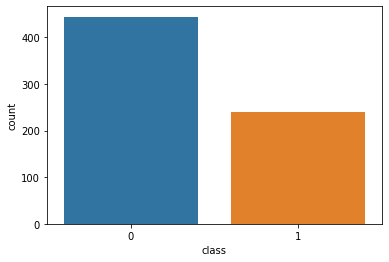

In [25]:
# Plot diagnosis frequencies
sns.countplot ( cancer_data [ 'class' ],label = "Count" ) # boxplot

In [26]:
def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

In [27]:
# Descriptive Statistics: Describe each variable by class (means only)
cancer_data.groupby ( [ 'class' ] )[ 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis' ].mean()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


In [28]:
# Descriptive Statistics: Describe each variable by class
cancer_data.groupby ( [ 'class' ] )[ 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis' ].describe()

clump_thickness                                                 \
                count      mean       std  min  25%  50%   75%   max   
class                                                                  
0               444.0  2.963964  1.672661  1.0  1.0  3.0   4.0   8.0   
1               239.0  7.188285  2.437907  1.0  5.0  8.0  10.0  10.0   

      uniformity_cell_size            ... normal_nucleoli       mitosis  \
                     count      mean  ...             75%   max   count   
class                                 ...                                 
0                    444.0  1.306306  ...             1.0   8.0   444.0   
1                    239.0  6.577406  ...             9.5  10.0   239.0   

                                                     
           mean       std  min  25%  50%  75%   max  
class                                                
0      1.065315  0.509738  1.0  1.0  1.0  1.0   8.0  
1      2.602510  2.564495  1.0  1.0  1.0  3.0  10.0  

[2 rows x 72 columns]

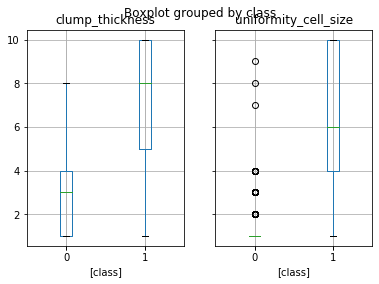

In [29]:
boxplot = cancer_data.boxplot ( column = [ 'clump_thickness', 'uniformity_cell_size' ], by = [ 'class' ] )

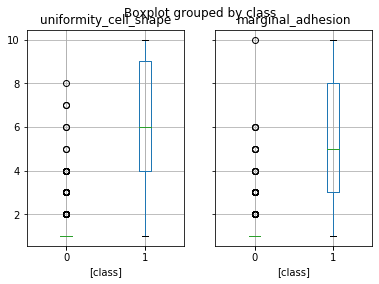

In [30]:
boxplot = cancer_data.boxplot ( column = [ 'uniformity_cell_shape', 'marginal_adhesion' ], by = [ 'class' ] )

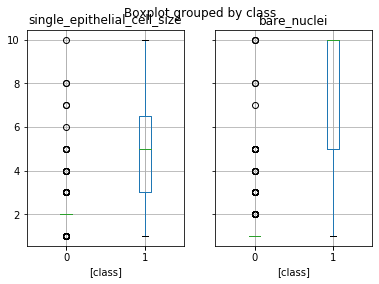

In [31]:
boxplot = cancer_data.boxplot ( column = ['single_epithelial_cell_size', 'bare_nuclei'], by = [ 'class' ] )

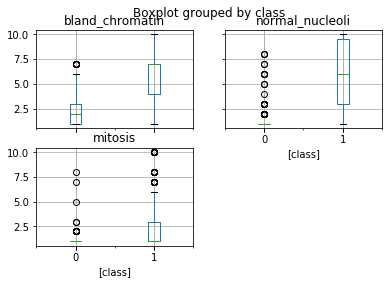

In [32]:
boxplot = cancer_data.boxplot ( column = [ 'bland_chromatin', 'normal_nucleoli', 'mitosis'  ], by = [ 'class' ] )

In [33]:
# Descriptive Statistics: Clump Thickness by Class
describe_by_category ( cancer_data, "clump_thickness", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.963964    7.188285
std      1.672661    2.437907
min      1.000000    1.000000
25%      1.000000    5.000000
50%      3.000000    8.000000
75%      4.000000   10.000000
max      8.000000   10.000000


In [34]:
# Descriptive Statistics: Uniformity Cell Size by Class
describe_by_category ( cancer_data, "uniformity_cell_size", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.306306    6.577406
std      0.855657    2.724244
min      1.000000    1.000000
25%      1.000000    4.000000
50%      1.000000    6.000000
75%      1.000000   10.000000
max      9.000000   10.000000


In [35]:
# Descriptive Statistics: Uniformity Cell Shape by Class
describe_by_category ( cancer_data, "uniformity_cell_shape", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.414414    6.560669
std      0.957031    2.569104
min      1.000000    1.000000
25%      1.000000    4.000000
50%      1.000000    6.000000
75%      1.000000    9.000000
max      8.000000   10.000000


In [36]:
# Descriptive Statistics: Marginal Adhesion by Class
describe_by_category ( cancer_data, "marginal_adhesion", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.346847    5.585774
std      0.917088    3.196631
min      1.000000    1.000000
25%      1.000000    3.000000
50%      1.000000    5.000000
75%      1.000000    8.000000
max     10.000000   10.000000


In [37]:
# Descriptive Statistics: Single Epithelial Cell Size by Class
describe_by_category ( cancer_data, "single_epithelial_cell_size", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.108108    5.326360
std      0.877112    2.443087
min      1.000000    1.000000
25%      2.000000    3.000000
50%      2.000000    5.000000
75%      2.000000    6.500000
max     10.000000   10.000000


In [38]:
# Descriptive Statistics: Bare Nuclei by Class
describe_by_category ( cancer_data, "bare_nuclei", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.346847    7.627615
std      1.177848    3.116679
min      1.000000    1.000000
25%      1.000000    5.000000
50%      1.000000   10.000000
75%      1.000000   10.000000
max     10.000000   10.000000


In [39]:
# Descriptive Statistics: Bland Chromatin by Class
describe_by_category ( cancer_data, "bland_chromatin", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     2.083333    5.974895
std      1.062299    2.282422
min      1.000000    1.000000
25%      1.000000    4.000000
50%      2.000000    7.000000
75%      3.000000    7.000000
max      7.000000   10.000000


In [40]:
# Descriptive Statistics: Normal Nucleoli by Class
describe_by_category ( cancer_data, "normal_nucleoli", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.261261    5.857741
std      0.954606    3.348876
min      1.000000    1.000000
25%      1.000000    3.000000
50%      1.000000    6.000000
75%      1.000000    9.500000
max      8.000000   10.000000


In [41]:
# Descriptive Statistics: Mitosis by Class
describe_by_category ( cancer_data, "mitosis", "class", transpose = True )

class           0           1
count  444.000000  239.000000
mean     1.065315    2.602510
std      0.509738    2.564495
min      1.000000    1.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    3.000000
max      8.000000   10.000000


## Winnow-2: Breast Cancer Data

In [42]:
# Log Experiment: Winnow-2 Breast Cancer Data
logger.info ( "Fitting Winnow-2 Classifiers to Breast Cancer Data Set" )

# Create the model object
# Call Winnow-2 Algorithm
# Initialize alpha (the weight scaler) to 2
# Set the threshold (theta) to 0.5
# Select all features (Xs)
cancer_winnow2 = Winnow2 ( weight_scaler_alpha = 2, threshold_theta = 0.5, number_of_features_d = cancer_data_boolean.shape [ 1 ] - 1 )

In [43]:
# Can't use?
# from sklearn.cross_validation import train_test_split
# Train, test, split the data
# X = cancer_data_boolean.drop ( [ 'class' ], axis = 1 ).values
# y = cancer_data_boolean['class'].values
# Without mean scaling data
#X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = seed )

In [44]:
# Implement 5 x 2 kfold Cross Validations
# Create the KFoldCV object
kfold = KFoldCV ( number_of_folds = 5, shuffle = True )

In [45]:
# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = cancer_winnow2,
    X = cancer_data_boolean.drop ( "class", axis = 1 ).values,
    y = cancer_data_boolean [ "class" ].values,
    kfold = kfold,
    randomseed = 5820,
    filename = "winnow2-cancer-test.csv" )

## Naive Bayes: Breast Cancer Data
### Boolean Data

In [46]:
# Log Experiment: Naive Bayes Boolean Breast Cancer Data
# Create the model object
# Call Naive BayesAlgorithm
# Using Boolean Data Set

logger.info ( "Fitting Naive Bayes on Boolean Breast Cancer Data Set" )
cancer_naive_bayes_bool = NaiveBayes ( column_distribution_map = 
                                     { column_index: "multinomial" for column_index in range 
                                      ( cancer_data_boolean.shape [ 1 ] - 1 ) } )

# Implement 5 x 2 kfold Cross Validations
# Create the KFoldCV object
kfold = KFoldCV ( number_of_folds = 5, shuffle = True )

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = cancer_naive_bayes_bool,
    X = cancer_data_boolean.drop ( "class", axis = 1 ).values,
    y = cancer_data_boolean [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-boolean-cancer-test.csv" )

## Naive Bayes: Breast Cancer Data
### Original (Continuous) Data

In [47]:
# Log Experiment: Naive Bayes Boolean Breast Cancer Data
# Create the model object
# Call Naive BayesAlgorithm
# Using Original (Continuous)

logger.info ( "Fitting Naive Bayes on Multinomial Breast Cancer Data Set" )
cancer_naive_bayes = NaiveBayes ( column_distribution_map = { column_index: "multinomial" for column_index in range ( cancer_data.drop ( "class", axis = 1 ).shape [ 1 ] ) } )

fit_predict_kfold (
    model_object = cancer_naive_bayes,
    X = cancer_data.drop ( "class", axis = 1 ).subtract ( 1 ).values,
    y = cancer_data [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-continuous-cancer-test.csv" )

# Glass Data Set
## Extract, Transform, Load: Glass Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Glass+Identification

### Attribute Information: 10 Attributes (d)

1. Id number: 1 to 214 
2. RI: refractive index 
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
4. Mg: Magnesium 
5. Al: Aluminum 
6. Si: Silicon 
7. K: Potassium 
8. Ca: Calcium 
9. Ba: Barium 
10. Fe: Iron 

### One Class Label
11. Type of glass: (class attribute) 
        - 1 building_windows_float_processed
        - 2 building_windows_non_float_processed
        - 3 vehicle_windows_float_processed
        - 4 vehicle_windows_non_float_processed (none in this database) 
        - 5 containers
        - 6 tableware
        - 7 headlamps

In [48]:
# Log ETL: Glass Data
logger.info ( "ETL: Glass Data Set" )
# Read Glass Data
glass_data = pd.read_csv ( "glass.data.csv",
    header = None,
    # Assign Column labels
    names = [
        "id_number",
        "refractive_index",
        "sodium",
        "magnesium",
        "aluminum",
        "silicon",
        "potassium",
        "calcium",
        "barium",
        "iron",
        "class",
    ],
)

In [49]:
# Verify whether any values are null
glass_data.isnull().values.any()

False

**Notes**

We see that there are no null values

In [50]:
# Just to be sure
# Replace "?" instance
glass_data.replace ( "?", np.NaN )
# Drop na
glass_data.dropna ( axis = 0, inplace = True )

In [51]:
# Again
glass_data.isna().any()

id_number           False
refractive_index    False
sodium              False
magnesium           False
aluminum            False
silicon             False
potassium           False
calcium             False
barium              False
iron                False
class               False
dtype: bool

**Notes**

We see no NaN values in any of the columns

In [52]:
# Confirm data was properly read by examining data frame
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
id_number           214 non-null int64
refractive_index    214 non-null float64
sodium              214 non-null float64
magnesium           214 non-null float64
aluminum            214 non-null float64
silicon             214 non-null float64
potassium           214 non-null float64
calcium             214 non-null float64
barium              214 non-null float64
iron                214 non-null float64
class               214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 20.1 KB


**Notes** 

As expected, Dataframe shows us we have 214 total observations & 11 columns (or, 11 variables). Each variable has 214observations, so we know we have no missing data. 

We see that the following variables are integers: id_number, class

We see that the following variables are floats: refractive_index, sodium, magnesium, aluminum, silicon, potassium, calcium, barium, iron

In [53]:
# Look at first few rows of dataframe
glass_data.head()

,id_number,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Notes**

Again, we see we'll need to eliminate id_number.

We also see that data instances here are continuous (float). We may want to discretize the boundaries for each variable.


In [54]:
# Drop id_number from cancer data set
#glass_data.drop ( [ 'id_number' ], axis = 'columns', inplace = True )
# Confirm
#glass_data.head()

## (Brief) Exploratory Data Analysis: Glass Data

### Single Variables

Let's look at the summary statistics & Tukey's 5


In [55]:
# Log EDA: Glass Data
logger.info ( "EDA: Glass Data Set" )

# Descriptive Statistics
glass_data.describe()

,id_number,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

We'll likely want to discretize these attributes by class

## (Brief) Exploratory Data Analysis: Glass Data

### Pair-Wise: Attribute by Class

In [56]:
# Frequency of glass classifications
glass_data [ 'class' ].value_counts() # raw counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

**Notes**

Number of observations for each glass classification:
    - 2 (building_windows_non_float_processed): 76
    - 1 (building_windows_float_processed): 70
    - 7 (headlamps): 29
    - 3 (vehicle_windows_float_processed): 17
    - 5 (containers): 13
    - 6 (tableware): 9

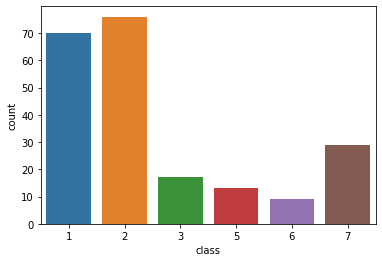

In [57]:
# Plot diagnosos frequencies
sns.countplot ( glass_data [ 'class' ],label = "Count" ) # boxplot

**Notes**

Number of observations for each glass classification:
    - 2 (building_windows_non_float_processed): 76
    - 1 (bhilding_windows_float_processed): 70
    - 7 (headlamps): 29
    - 3 (vehicle_windows_float_processed): 17
    - 5 (containers): 13
    - 6 (tableware): 9

In [58]:
# Descriptive Statistics: Describe each variable by class (means only)
glass_data.groupby ( [ 'class' ] )[ 'refractive_index', "sodium", "magnesium", "aluminum","silicon","potassium","calcium","barium","iron" ].mean()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
class,,,,,,,,,
1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [59]:
# Descriptive Statistics: Describe each variable by class (all variables)
glass_data.groupby ( [ 'class' ] ) [ 'refractive_index', "sodium", "magnesium", "aluminum","silicon","potassium","calcium","barium","iron" ].describe()        

refractive_index                                                   \
                 count      mean       std      min       25%       50%   
class                                                                     
1                 70.0  1.518718  0.002268  1.51215  1.517540  1.517835   
2                 76.0  1.518619  0.003802  1.51409  1.516377  1.517100   
3                 17.0  1.517964  0.001916  1.51610  1.516550  1.517690   
5                 13.0  1.518928  0.003345  1.51316  1.516660  1.519940   
6                  9.0  1.517456  0.003116  1.51115  1.518290  1.518880   
7                 29.0  1.517116  0.002545  1.51131  1.516090  1.516510   

                         sodium             ... barium        iron            \
            75%      max  count       mean  ...    75%   max count      mean   
class                                       ...                                
1      1.519560  1.52667   70.0  13.242286  ...   0.00  0.69  70.0  0.057000   
2      1.518487  1.53393   76.0  13.111711  ...   0.00  3.15  76.0  0.079737   
3      1.518320  1.52211   17.0  13.437059  ...   0.00  0.15  17.0  0.057059   
5      1.521190  1.52369   13.0  12.827692  ...   0.00  2.20  13.0  0.060769   
6      1.519160  1.51969    9.0  14.646667  ...   0.00  0.00   9.0  0.000000   
7      1.517270  1.52365   29.0  14.442069  ...   1.59  2.88  29.0  0.013448   

                                             
            std  min  25%  50%    75%   max  
class                                        
1      0.089075  0.0  0.0  0.0  0.110  0.31  
2      0.106433  0.0  0.0  0.0  0.155  0.35  
3      0.107864  0.0  0.0  0.0  0.090  0.37  
5      0.155588  0.0  0.0  0.0  0.000  0.51  
6      0.000000  0.0  0.0  0.0  0.000  0.00  
7      0.029794  0.0  0.0  0.0  0.000  0.09  

[6 rows x 72 columns]

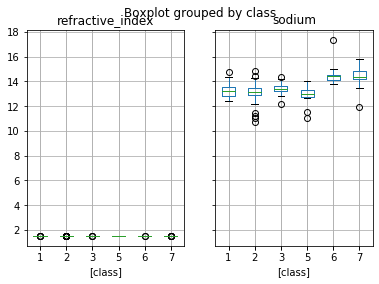

In [60]:
boxplot = glass_data.boxplot ( column = [ 'refractive_index', 'sodium' ], by = [ 'class' ] )

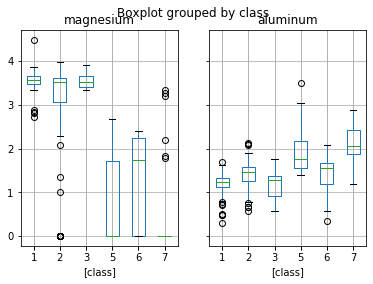

In [61]:
boxplot = glass_data.boxplot ( column = [ "magnesium", "aluminum" ], by = [ 'class' ] )

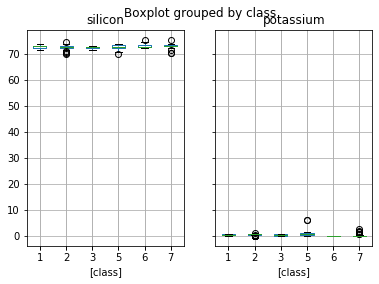

In [62]:
boxplot = glass_data.boxplot ( column = [ "silicon","potassium" ], by = [ 'class' ] )

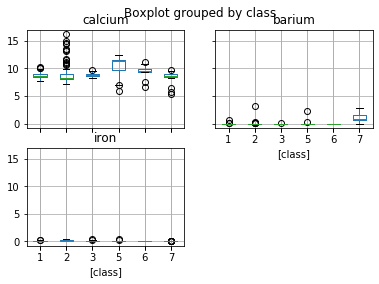

In [63]:
boxplot = glass_data.boxplot ( column = [ "calcium","barium","iron" ], by = [ 'class' ] )

In [64]:
# Descriptive Statistics: Describe each variable by class
# Refractive Index by Class
describe_by_category ( glass_data, "refractive_index", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    1.518718   1.518619   1.517964   1.518928  1.517456   1.517116
std     0.002268   0.003802   0.001916   0.003345  0.003116   0.002545
min     1.512150   1.514090   1.516100   1.513160  1.511150   1.511310
25%     1.517540   1.516377   1.516550   1.516660  1.518290   1.516090
50%     1.517835   1.517100   1.517690   1.519940  1.518880   1.516510
75%     1.519560   1.518487   1.518320   1.521190  1.519160   1.517270
max     1.526670   1.533930   1.522110   1.523690  1.519690   1.523650


**Notes**

We observe that for each class, the arithmetic mean of refractive index has very little variability.  We can discretize the boundary to roughly 1.518 for all classes

In [65]:
# Descriptive Statistics: Describe each variable by class
# Sodium by Class
describe_by_category ( glass_data, "sodium", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean   13.242286  13.111711  13.437059  12.827692  14.646667  14.442069
std     0.499301   0.664159   0.506887   0.777037   1.084020   0.686359
min    12.450000  10.730000  12.160000  11.030000  13.790000  11.950000
25%    12.825000  12.885000  13.240000  12.730000  14.090000  14.200000
50%    13.195000  13.155000  13.420000  12.970000  14.400000  14.390000
75%    13.525000  13.432500  13.640000  13.270000  14.560000  14.860000
max    14.770000  14.860000  14.320000  14.010000  17.380000  15.790000


**Notes**

We see here that values range from 10.73 to 15.79, with mean values hovering around 13.2, 12.8, and 14.5. It would be logical to discretize into: 10.5, 12.5, 14.5

In [66]:
# Descriptive Statistics: Describe each variable by class
# Magnesium by Class
describe_by_category ( glass_data, "magnesium", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    3.552429   3.002105   3.543529   0.773846  1.305556   0.538276
std     0.247043   1.215661   0.162786   0.999146  1.097134   1.117683
min     2.710000   0.000000   3.340000   0.000000  0.000000   0.000000
25%     3.480000   3.057500   3.400000   0.000000  0.000000   0.000000
50%     3.565000   3.520000   3.530000   0.000000  1.740000   0.000000
75%     3.657500   3.622500   3.650000   1.710000  2.240000   0.000000
max     4.490000   3.980000   3.900000   2.680000  2.410000   3.340000


**Notes**

We see here that values range from 0 (min class 2) to 4.49 (max class 1). Means range from 3.55 (Class 1), 3.00 (Class 2), 3.54 (Class 3), 0.77 (Class 5), 1.30 (Class 6), and 0.538 (Class 7). We'll discretize to 1, 2, 3, 4

In [67]:
# Descriptive Statistics: Describe each variable by class
# Aluminum by Class
describe_by_category ( glass_data, "aluminum", "class", transpose = True )

class          1          2          3          5         6          7
count  70.000000  76.000000  17.000000  13.000000  9.000000  29.000000
mean    1.163857   1.408158   1.201176   2.033846  1.366667   2.122759
std     0.273158   0.318340   0.347489   0.693920  0.571861   0.442726
min     0.290000   0.560000   0.580000   1.400000  0.340000   1.190000
25%     1.112500   1.247500   0.910000   1.560000  1.190000   1.870000
50%     1.230000   1.460000   1.280000   1.760000  1.560000   2.060000
75%     1.327500   1.570000   1.380000   2.170000  1.660000   2.420000
max     1.690000   2.120000   1.760000   3.500000  2.090000   2.880000


**Notes**

We see here that values range from 0.29 (Min Class 1) to 3.5 (Max Class 5). Means range from 1.16 (Class 1), 1.40 (Class 2), 1.2 (Class 3), 2.0 (Class 5),1.36 (Class 6), 2.12 (Class 7) and stds range from 0.27 up to 0.69. We'll; discretize to 0.5, 1, 1.5, 2, 2.5

In [68]:
# Descriptive Statistics: Describe each variable by class
# Silicon by Class
describe_by_category ( glass_data, "silicon", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean   72.619143  72.598026  72.404706  72.366154  73.206667  72.965862
std     0.569484   0.724573   0.512276   1.282319   1.079467   0.940234
min    71.350000  69.810000  71.360000  69.890000  72.370000  70.260000
25%    72.080000  72.330000  72.040000  72.180000  72.500000  72.860000
50%    72.815000  72.735000  72.640000  72.690000  72.740000  73.110000
75%    73.017500  73.062500  72.700000  73.390000  73.480000  73.360000
max    73.700000  74.450000  73.010000  73.880000  75.410000  75.180000


**Notes**

We see here that values range from 69.81 (Min Class 2) to 75.41 (Max Class 6). Means are all roughly equivalent, rangiong from 72.59 (Class 2) to 73.20 (Class 6). We'll discretize to 72.5, 73.0, 73.5, 74.0

In [69]:
# Descriptive Statistics: Describe each variable by class
# Potassium by Class
describe_by_category ( glass_data, "potassium", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.447429   0.521053   0.406471   1.470000  0.0   0.325172
std     0.214879   0.213726   0.229890   2.138695  0.0   0.668493
min     0.000000   0.000000   0.000000   0.130000  0.0   0.000000
25%     0.200000   0.480000   0.160000   0.380000  0.0   0.000000
50%     0.560000   0.580000   0.560000   0.580000  0.0   0.000000
75%     0.590000   0.650000   0.570000   0.970000  0.0   0.140000
max     0.690000   1.100000   0.610000   6.210000  0.0   2.700000


**Notes**

We see here that values range from 0 to 6.21 (Max Class 8). We'll discretize to 0.2, 0.6, 1.2, 1.6

In [70]:
# Descriptive Statistics: Describe each variable by class
# Calcium by Class
describe_by_category ( glass_data, "calcium", "class", transpose = True )

class          1          2          3          5          6          7
count  70.000000  76.000000  17.000000  13.000000   9.000000  29.000000
mean    8.797286   9.073684   8.782941  10.123846   9.356667   8.491379
std     0.574807   1.921635   0.380111   2.183791   1.449948   0.973505
min     7.780000   7.080000   8.320000   5.870000   6.650000   5.430000
25%     8.430000   8.037500   8.530000   9.700000   9.260000   8.440000
50%     8.675000   8.275000   8.790000  11.270000   9.570000   8.670000
75%     9.052500   8.915000   8.930000  11.530000   9.950000   8.950000
max    10.170000  16.190000   9.650000  12.500000  11.220000   9.760000


**Notes**

We see that the values range from 5.43 (Min Class 7) to 16.19 (Max Class 2). We'll discretize to 6, 9, 12

In [71]:
# Descriptive Statistics: Describe each variable by class
# Barium by Class
describe_by_category ( glass_data, "barium", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.012714   0.050263   0.008824   0.187692  0.0   1.040000
std     0.083838   0.362340   0.036380   0.608251  0.0   0.665341
min     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
25%     0.000000   0.000000   0.000000   0.000000  0.0   0.610000
50%     0.000000   0.000000   0.000000   0.000000  0.0   0.810000
75%     0.000000   0.000000   0.000000   0.000000  0.0   1.590000
max     0.690000   3.150000   0.150000   2.200000  0.0   2.880000


**Notes**

We see that the values range from 0 to 3.15. We'll discretize to 0.5, 1.0, 2.0

In [72]:
# Descriptive Statistics: Describe each variable by class
# Iron by Class
describe_by_category ( glass_data, "iron", "class", transpose = True )

class          1          2          3          5    6          7
count  70.000000  76.000000  17.000000  13.000000  9.0  29.000000
mean    0.057000   0.079737   0.057059   0.060769  0.0   0.013448
std     0.089075   0.106433   0.107864   0.155588  0.0   0.029794
min     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
25%     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
50%     0.000000   0.000000   0.000000   0.000000  0.0   0.000000
75%     0.110000   0.155000   0.090000   0.000000  0.0   0.000000
max     0.310000   0.350000   0.370000   0.510000  0.0   0.090000


**Notes**

We see that the values range from 0 to 0.51 (Max Class 5). We'll discretize to 0.2 and 0.6

In [73]:
# Discretize
discretize_boundries_glass = {
    "refractive_index": [1.518],
    "sodium": [10.5, 12.5, 14.5],
    "magnesium": [1, 2, 3, 4],
    "aluminum": [0.5, 1.5, 2, 2.5],
    "silicon": [72.5, 73.0, 73.5, 74.0],
    "potassium": [0.2, 0.6, 1.2, 1.6],
    "calcium": [6, 9, 12],
    "barium": [0.5, 1.0, 2.0],
    "iron": [0.2, 0.6],
}

In [74]:
# Assign Xs & Ys
# Eliminate id_number
# Set class as category y
# Set attributes as X

X_glass, y_glass = discretize_dataframe (
    glass_data.drop ( "id_number", axis = 1 ), discretize_boundries_glass
).pipe(
    lambda df: (
        df.drop ( "class", axis = 1 ).values,
        df [ "class" ].astype ( "category" ).cat.codes.values,
    )
)

## Winnow-2 Glass Data

In [75]:
# Log Experiment: Winnow-2 Glass Data
logger.info ( "Fitting Winnow2 on Glass Data Set" )

# Create the model object
# Call Winnow-2 Algorithm
# Initialize alpha (the weight scaler) to 2
# Set the threshold (theta) to 0.5
# Select all features (Xs)

glass_winnow2 = MulticlassClassifier (
    model_class = Winnow2,
    classes = [ 0, 1, 2, 3, 4, 5 ], # 6 classes in data set
    class_kwargs = {
        cls: { "weight_scaler_alpha": 2, "threshold_theta": 0.5, "number_of_features_d": X_glass.shape [ 1 ] }
        for cls in [ 0, 1, 2, 3, 4, 5 ]
    },
)

# Implement 5 x 2 kfold Cross Validations
# Run kfold & evaluate predictions
fit_predict_kfold ( 
    model_object = glass_winnow2, 
    X = X_glass, 
    y = y_glass, 
    kfold = kfold, 
    randomseed = 682020,
    filename = "winnow2-glass-test.csv" 
)

## Naive Bayes Glass Data
### Boolean Data

In [76]:
# Log Experiment: Naive Bayes Boolean Glass Data
logger.info ( "Fitting Naive Bayes on Boolean Glass Data Set" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Boolean Data Set
glass_naive_bayes_bool = MulticlassClassifier (
    model_class = NaiveBayes,
    classes = [ 0, 1, 2, 3, 4, 5 ], # 6 classes
    # Binomial mapping (X values)
    class_kwargs = {
        cls: {
            "column_distribution_map": {
                col: "multinomial" for col in range ( X_glass.shape [ 1 ] )
            },
            "binomial": True,
        }
        
        for cls in [ 0, 1, 2, 3, 4, 5 ]
    },
)

# Implement 5 x 2 kfold Cross Validations
# Run kfold & evaluate predictions
fit_predict_kfold (
    model_object = glass_naive_bayes_bool, 
    X = X_glass, 
    y = y_glass, 
    kfold = kfold, 
    randomseed = 682020,
    filename = "naive-bayes-bool-glass-test.csv", 
)

## Naive Bayes Glass Data
### Original (Continuous) Data

In [77]:
# Log Experiment: Naive Bayes Continuous Glass Data
logger.info ( "Fitting Naive Bayes on Continuous Glass Data" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Original (Continuous)
X_glass_continuous = glass_data.drop ( [ "id_number", "class" ], axis = 1 ).values
y_glass_continuous = glass_data [ "class" ].astype ( "category" ).cat.codes.values

# Normal distribution
glass_naive_bayes_multinom = NaiveBayes (
    column_distribution_map = {
        col: "gaussian" for col in range ( X_glass_continuous.shape [ 1 ] )
    },
)

# Implement 5 x 2 kfold Cross Validations
# Run kfold & evaluate predictions
fit_predict_kfold (
    model_object = glass_naive_bayes_multinom,
    X = X_glass_continuous,
    y = y_glass_continuous,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-continuous-glass-test.csv", 
)

# Iris Data Set
## Extract, Transform, Load: Iris Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Iris

### Attribute Information: 5 Attributes (d)

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

### One Class Label
5. Type of Iris (class):
        - Iris Setosa 
        - Iris Versicolour
        - Iris Virginica

In [78]:
# Log ETL: Iris Data
logger.info ( "ETL: Iris Data Set" )

# Read Iris Data
iris_data = pd.read_csv ( "iris.data.csv",
        header = 0,
        # Assign Column Labels (i.e., variables names)
        names = [
            "sepal_length", 
            "sepal_width", 
            "petal_length", 
            "petal_width", 
            "class"],
)

In [79]:
# Verify whether any values are null
iris_data.isnull().values.any()

False

**Notes**

We observe no null instances

In [80]:
# Replace "?" instance
iris_data.replace ( "?", np.NaN )
# Drop na
iris_data.dropna ( axis = 0, inplace = True )

In [81]:
# Again
iris_data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

**Notes**

We observe no null instances in any of the attribute columns

In [82]:
# Confirm data was properly read by examining data frame
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     149 non-null float64
petal_length    149 non-null float64
petal_width     149 non-null float64
class           149 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Notes**

We observe that each attribute is a float

In [83]:
# Look at first few rows of dataframe
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [84]:
# Classification for Class Label: data frame for this category
iris_data[ "class" ].astype ( "category" ).cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Length: 149, dtype: int8

## (Brief) Exploratory Data Analysis: Iris Data

### Single Variable

In [85]:
# Log EDA: Iris Data
logger.info ( "EDA: Iris Data Set" )

# Descriptive Statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Notes**

Total number of observations: 149

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Iris Data

### Pair-Wise: Attribute by Class

In [86]:
# Frequency of diagnoses classifications
iris_data [ 'class' ].value_counts() # raw counts

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64

**Notes**

We see there are 50 instances of Iris Virginica, 50 instances of Iris Versicolor, and 50 instances of Iris-setosa

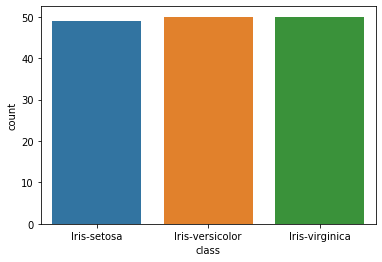

In [87]:
# Plot diagnosos frequencies
sns.countplot ( iris_data [ 'class' ],label = "Count" ) # boxplot

In [88]:
# Descriptive Statistics: Describe each variable by class (means only)
iris_data.groupby ( [ 'class' ] )[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ].mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.004082,3.416327,1.465306,0.244898
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.588000,2.974000,5.552000,2.026000


In [89]:
# Descriptive Statistics: Describe each variable by class (means only)
iris_data.groupby ( [ 'class' ] )[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' ].describe()

sepal_length                                                 \
                       count      mean       std  min    25%  50%  75%  max   
class                                                                         
Iris-setosa             49.0  5.004082  0.355879  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936000  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width            ... petal_length      petal_width  \
                      count      mean  ...          75%  max       count   
class                                  ...                                 
Iris-setosa            49.0  3.416327  ...        1.600  1.9        49.0   
Iris-versicolor        50.0  2.770000  ...        4.600  5.1        50.0   
Iris-virginica         50.0  2.974000  ...        5.875  6.9        50.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
class                                                         
Iris-setosa      0.244898  0.108130  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326000  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026000  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

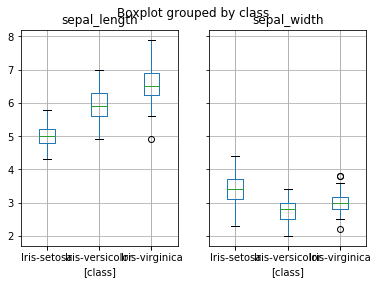

In [90]:
boxplot = iris_data.boxplot ( column = [ "sepal_length", "sepal_width"], by = [ 'class' ] )

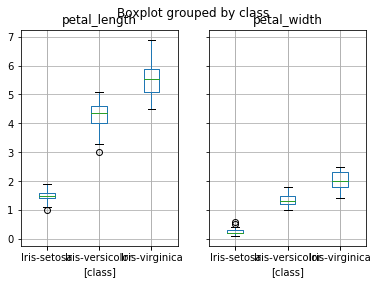

In [91]:
boxplot = iris_data.boxplot ( column = [ "petal_length", "petal_width" ], by = [ 'class' ] )

In [92]:
# Descriptive Statistics: Attribute by Class
# Sepal Length by Class
describe_by_category ( iris_data, "sepal_length", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000        50.00000
mean      5.004082         5.936000         6.58800
std       0.355879         0.516171         0.63588
min       4.300000         4.900000         4.90000
25%       4.800000         5.600000         6.22500
50%       5.000000         5.900000         6.50000
75%       5.200000         6.300000         6.90000
max       5.800000         7.000000         7.90000


**Notes**

We see that sepal length ranges from 4.3 (Iris-setosa) to 7.9 (Iris-virginica).The mean for Iris-setosa is 5.00 (std 0.355). The mean for Iris-versicolor is 5.9 (std 0.516). The mean for Iris-virginica is 6.5 (std 0.635). We'll discretize using 4.5, 5.5, 6.5, 7.5.

In [93]:
# Descriptive Statistics: Attribute by Class
# Sepal Width by Class
describe_by_category ( iris_data, "sepal_width", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000       50.000000
mean      3.416327         2.770000        2.974000
std       0.384787         0.313798        0.322497
min       2.300000         2.000000        2.200000
25%       3.100000         2.525000        2.800000
50%       3.400000         2.800000        3.000000
75%       3.700000         3.000000        3.175000
max       4.400000         3.400000        3.800000


**Notes**

We see that sepal width ranges from 2.0 (Iris-versicolor) to 4.4 (Iris-setosa).The mean for Iris-setosa is 3.41 (std 0.384). The mean for Iris-versicolor is 2.77 (std 0.516). The mean for Iris-virginica is 2.97 (std 0.322). We'll discretize using 2, 3, 4.

In [94]:
# Descriptive Statistics: Attribute by Class
# Petal Length by Class
describe_by_category ( iris_data, "petal_length", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000       50.000000
mean      1.465306         4.260000        5.552000
std       0.175061         0.469911        0.551895
min       1.000000         3.000000        4.500000
25%       1.400000         4.000000        5.100000
50%       1.500000         4.350000        5.550000
75%       1.600000         4.600000        5.875000
max       1.900000         5.100000        6.900000


**Notes**

We see that petal length ranges from 1.0 (Iris-versicolor) to 6.9 (Iris-virginica).The mean for Iris-setosa is 1.46 (std 0.175). The mean for Iris-versicolor is 4.26 (std 0.469). The mean for Iris-virginica is 5.55 (std 0.355). We'll discretize using 1, 2, 4, 6.

In [95]:
# Descriptive Statistics: Attribute by Class
# Petal Width by Class
describe_by_category ( iris_data, "petal_width", "class", transpose = True )

class  Iris-setosa  Iris-versicolor  Iris-virginica
count    49.000000        50.000000        50.00000
mean      0.244898         1.326000         2.02600
std       0.108130         0.197753         0.27465
min       0.100000         1.000000         1.40000
25%       0.200000         1.200000         1.80000
50%       0.200000         1.300000         2.00000
75%       0.300000         1.500000         2.30000
max       0.600000         1.800000         2.50000


**Notes**

We see that petal width ranges from 0.10 (Iris-setosa) to 2.5 (Iris-virginica). The mean for Iris-setosa is 0.244 (std 0.108). The mean for Iris-versicolor is 1.32 (std 0.197). The mean for Iris-virginica is 2.02 (std 0.27). We'll discretize using 0.5, 1, 1.5, 2

In [96]:
# Discretize the data
# Set class as category y
# Set attributes as X
X_iris, y_iris = discretize_dataframe (
    iris_data,
    discretize_boundries = {
        "sepal_length": [4.5, 5.5, 6.5, 7.5],
        "sepal_width": [2, 3, 4],
        "petal_width": [0.5, 1, 1.5, 2],
        "petal_length": [1, 2, 4, 6],
    },
).pipe(
    lambda df: (
        df.filter ( like = "]" ).values,
        df [ "class" ].astype ( "category" ).cat.codes.values,
    )
)

## Winnow-2 Iris Data

In [97]:
# Log Experiment: Winnow-2 Iris Data
logger.info ( "Fitting Winnow-2 Classifiers to Iris Data Set" )

# Create the model object
# Call Winnow-2 Algorithm
# Initialize alpha (the weight scaler) to 2
# Set the threshold (theta) to 0.5
# Select all features
# We create the model object and KFoldCV object
iris_winnow2 = MulticlassClassifier (
    model_class = Winnow2,
    classes = [ 0, 1, 2 ], # 3 classes
    class_kwargs = {
        cls: { "weight_scaler_alpha": 2, "threshold_theta": 0.5, "number_of_features_d": X_iris.shape [ 1 ] }
        for cls in [ 0, 1, 2 ]
    },
)

# Implement 5 x 2 kfold Cross Validations
# Create the KFoldCV object
kfold = KFoldCV ( number_of_folds = 5, shuffle = True )

In [98]:
# Run kfold & evaluate predictions
# Save predictions to csv file
logger.info ( "Fitting Winnow2 on Boolean Iris Dataset" )
fit_predict_kfold (
    model_object = iris_winnow2,
    X = X_iris,
    y = y_iris,
    kfold = kfold,
    randomseed = 682020,
    filename="winnow2-iris-test.csv",
)

# Naive Bayes: Iris Data
## Boolean Data

In [99]:
# Log Experiment: Naive Bayes Boolean Iris Data
logger.info ( "Fitting Naive Bayes on Boolean Iris Dataset" )
# Create the model object
# Call Naive BayesAlgorithm
# Using Boolean Data Set
iris_naive_bayes = MulticlassClassifier (
    model_class = NaiveBayes,
    classes = [ 0, 1, 2 ], # 3 classes
    class_kwargs = {
        cls: {
            "column_distribution_map": {
                col: "multinomial" for col in range ( X_iris.shape [ 1 ] )
            },
            "binomial": True,
        }
        for cls in [ 0, 1, 2 ]
    },
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = iris_naive_bayes,
    X = X_iris,
    y = y_iris,
    kfold = kfold,
    randomseed = 682020,
    filename ="naive-bayes-boolean-iris-test.csv",
)

## Naive Bayes: Iris Data
### Original (Continuous) Data

In [100]:
# Log Experiment: Naive Bayes Continuous Iris Data
logger.info ( "Fitting Naive Bayes on Continuous Iris Dataset" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Original (Continuous) Data
iris_naive_bayes_continuous = NaiveBayes (
    column_distribution_map = { col: "gaussian" for col in range ( X_iris.shape [ 1 ] ) }
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = iris_naive_bayes_continuous,
    X = iris_data.drop ("class", axis = 1 ).values,
    y = iris_data [ "class" ].astype ( "category" ).cat.codes.values,
    kfold = kfold,
    randomseed = 682020,
    filename="naive-bayes-continuous-iris-test.csv",
)

# Soybean Data Set
## Extract, Transform, Load: Soybean Data

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Soybean+%28Small%29

### Attribute Information: 10 Attributes (d)

1. date: april,may,june,july,august,september,october,?. 
2. plant-stand: normal,lt-normal,?. 
3. precip: lt-norm,norm,gt-norm,?. 
4. temp: lt-norm,norm,gt-norm,?. 
5. hail: yes,no,?. 
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs, same-lst-sev-yrs,?. 
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?. 
8. severity: minor,pot-severe,severe,?. 
9. seed-tmt: none,fungicide,other,?. 
10. germination: 90-100%,80-89%,lt-80%,?. 
11. plant-growth: norm,abnorm,?. 
12. leaves: norm,abnorm. 
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?. 
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?. 
15. leafspot-size: lt-1/8,gt-1/8,dna,?. 
16. leaf-shread: absent,present,?. 
17. leaf-malf: absent,present,?. 
18. leaf-mild: absent,upper-surf,lower-surf,?. 
19. stem: norm,abnorm,?. 
20. lodging: yes,no,?. 
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?. 
22. canker-lesion: dna,brown,dk-brown-blk,tan,?. 
23. fruiting-bodies: absent,present,?. 
24. external decay: absent,firm-and-dry,watery,?. 
25. mycelium: absent,present,?. 
26. int-discolor: none,brown,black,?. 
27. sclerotia: absent,present,?. 
28. fruit-pods: norm,diseased,few-present,dna,?. 
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?. 
30. seed: norm,abnorm,?. 
31. mold-growth: absent,present,?. 
32. seed-discolor: absent,present,?. 
33. seed-size: norm,lt-norm,?. 
34. shriveling: absent,present,?. 
35. roots: norm,rotted,galls-cysts,?.

### One Class Label

36. Class



In [101]:
# Log ETL: Soybean Data
logger.info ( "ETL: Soybean Data Set" )

# Read Soybean Data
soybean_data = pd.read_csv ( "soybean-small.data.csv",
        header = 0,
        # Assign Column Labels (i.e., variables names)
        names = [
            "date",
            "plant-stand",
            "precip",
            "temp",
            "hail",
            "crop-hist",
            "area-damaged",
            "severity",
            "seed-tmt",
            "germination",
            "plant-growth",
            "leaves",
            "leafspots-halo",
            "leafspots-marg",
            "leafspot-size",
            "leaf-shread",
            "leaf-malf",
            "leaf-mild",
            "stem",
            "lodging",
            "stem-cankers",
            "canker-lesion",
            "fruiting-bodies",
            "external decay",
            "mycelium",
            "int-discolor",
            "sclerotia",
            "fruit-pods",
            "fruit spots",
            "seed",
            "mold-growth",
            "seed-discolor",
            "seed-size",
            "shriveling",
            "roots",
            "instance_class",
        ],
    )

In [102]:
# Verify whether any values are null
soybean_data.isnull().values.any()

False

**Note**

We see there are no null instances

In [103]:
# Replace "?" instance
soybean_data.replace ( "?", np.NaN )
# Drop na
soybean_data.dropna ( axis = 0, inplace = True )

In [104]:
# Again
soybean_data.isna().any()

date               False
plant-stand        False
precip             False
temp               False
hail               False
crop-hist          False
area-damaged       False
severity           False
seed-tmt           False
germination        False
plant-growth       False
leaves             False
leafspots-halo     False
leafspots-marg     False
leafspot-size      False
leaf-shread        False
leaf-malf          False
leaf-mild          False
stem               False
lodging            False
stem-cankers       False
canker-lesion      False
fruiting-bodies    False
external decay     False
mycelium           False
int-discolor       False
sclerotia          False
fruit-pods         False
fruit spots        False
seed               False
mold-growth        False
seed-discolor      False
seed-size          False
shriveling         False
roots              False
instance_class     False
dtype: bool

**Notes**

Again, we find no NaN instances in any of the column attributes. We also observe that the last column is the class label

In [105]:
# Confirm data was properly read by examining data frame
soybean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 36 columns):
date               46 non-null int64
plant-stand        46 non-null int64
precip             46 non-null int64
temp               46 non-null int64
hail               46 non-null int64
crop-hist          46 non-null int64
area-damaged       46 non-null int64
severity           46 non-null int64
seed-tmt           46 non-null int64
germination        46 non-null int64
plant-growth       46 non-null int64
leaves             46 non-null int64
leafspots-halo     46 non-null int64
leafspots-marg     46 non-null int64
leafspot-size      46 non-null int64
leaf-shread        46 non-null int64
leaf-malf          46 non-null int64
leaf-mild          46 non-null int64
stem               46 non-null int64
lodging            46 non-null int64
stem-cankers       46 non-null int64
canker-lesion      46 non-null int64
fruiting-bodies    46 non-null int64
external decay     46 non-null int64
mycelium 

**Notes**

We see n = 46 and there are 46 instances in each attribute column (thus, no missing data). All attribute (Xs) columns are integers and the instance class is an object.

## (Brief) Exploratory Data Analysis: Soybean Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [106]:
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,instance_class
0,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,0,0,4,0,0,0,0,0,0,D1


**Notes**

We see that we'll need to use one-hot encoding for the instance class and we may need to eliminate columns where data has no variance. These will not help the algorithm learn classes. 

In [107]:
# Drop columns with no variance
for col in soybean_data.columns:
    if len(soybean_data[col].unique()) == 1:
        soybean_data.drop(col,inplace = True, axis = 1 )
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,instance_class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,D1


In [108]:
print ( soybean_data.columns )

Index(['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist',
       'area-damaged', 'severity', 'seed-tmt', 'germination', 'leaves',
       'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies',
       'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods',
       'roots', 'instance_class'],
      dtype='object')


In [109]:
# Rename column
soybean_data.rename ( columns = { "instance_class":"class" }, inplace = True)

In [110]:
# Assign class as category label
soybean_data [ "class" ].astype ( "category" ).cat.codes
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,D1
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,D1
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,D1
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,D1
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,D1


In [111]:
# Find Y Categories
print ( soybean_data [ "class" ] )

0     D1
1     D1
2     D1
3     D1
4     D1
5     D1
6     D1
7     D1
8     D1
9     D2
10    D2
11    D2
12    D2
13    D2
14    D2
15    D2
16    D2
17    D2
18    D2
19    D3
20    D3
21    D3
22    D3
23    D3
24    D3
25    D3
26    D3
27    D3
28    D3
29    D4
30    D4
31    D4
32    D4
33    D4
34    D4
35    D4
36    D4
37    D4
38    D4
39    D4
40    D4
41    D4
42    D4
43    D4
44    D4
45    D4
Name: class, dtype: object


In [112]:
# Map class values to values
# D1 = 0; D2 = 1; D3 = 2; D4 = 3
soybean_data [ 'class' ] = soybean_data [ 'class' ].map ( { 'D1' : 0, 'D2' : 1, 'D3' : 2, 'D4': 3 } )
# Confirm
soybean_data.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
0,5,0,2,1,0,3,1,1,1,2,...,3,0,1,1,0,0,0,0,0,0
1,3,0,2,1,0,2,0,2,1,1,...,3,0,1,1,0,0,0,0,0,0
2,6,0,2,1,0,1,1,1,0,0,...,3,1,1,1,0,0,0,0,0,0
3,4,0,2,1,0,3,0,2,0,2,...,3,1,1,1,0,0,0,0,0,0
4,5,0,2,1,0,2,0,1,1,0,...,3,1,1,1,0,0,0,0,0,0


In [113]:
print ( soybean_data [ 'class' ] )

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
Name: class, dtype: int64


In [114]:
# One-hot encoding/Dummy variables for all attribute columns
soybean_bool = pd.get_dummies (
    soybean_data,
    columns = [ col for col in soybean_data.columns if col != "class" ],
    drop_first = True,
)

# Confirm
soybean_bool.head()

,class,date_1,date_2,date_3,date_4,date_5,date_6,plant-stand_1,precip_1,precip_2,...,canker-lesion_1,canker-lesion_2,canker-lesion_3,fruiting-bodies_1,external decay_1,mycelium_1,int-discolor_2,sclerotia_1,fruit-pods_3,roots_1
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0


## (Brief) Exploratory Data Analysis: Soybean Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [115]:
# Log EDA: Soybean Data
logger.info ( "EDA: Soybean Data Set" )

# Descriptive Statistics
soybean_data.describe()


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots,class
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2.673913,0.543478,1.478261,0.760870,0.304348,1.739130,1.23913,1.413043,0.500000,1.108696,...,1.369565,1.717391,0.195652,0.543478,0.108696,0.434783,0.217391,1.760870,0.391304,1.760870
std,2.055392,0.503610,0.836371,0.672798,0.465215,1.083918,0.84813,0.497821,0.505525,0.822686,...,1.040485,0.910752,0.401085,0.503610,0.314696,0.834058,0.417029,1.493464,0.493435,1.158251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.00000,1.000000,0.500000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000
75%,4.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.00000,2.000000,1.000000,2.000000,...,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000


**Notes**

Total number of observations: 46

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Soybean Data

### Pair-Wise: Attribute by Class

In [116]:
# Frequency of diagnoses classifications
soybean_data [ 'class' ].value_counts() # raw counts

3    17
2    10
1    10
0     9
Name: class, dtype: int64

**Notes**

Here we see 9 observations in class 0, 10 observations in class 1, 10 observations in class 2, and 17 observations in class 3

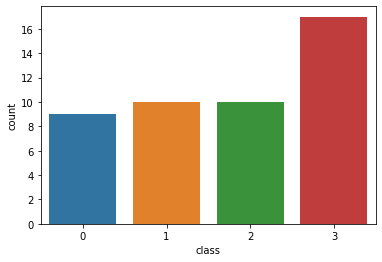

In [117]:
# Plot diagnosos frequencies
sns.countplot ( soybean_data [ 'class' ],label = "Count" ) # boxplot

In [118]:
# Get Columns again
list ( soybean_data.columns )

['date',
 'plant-stand',
 'precip',
 'temp',
 'hail',
 'crop-hist',
 'area-damaged',
 'severity',
 'seed-tmt',
 'germination',
 'leaves',
 'lodging',
 'stem-cankers',
 'canker-lesion',
 'fruiting-bodies',
 'external decay',
 'mycelium',
 'int-discolor',
 'sclerotia',
 'fruit-pods',
 'roots',
 'class']

In [119]:
# Descriptive Statistics: Describe each variable by class (means only)
soybean_data.groupby ( [ 'class' ] )[ 'date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','leaves','lodging','stem-cankers','canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods','roots' ].mean()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots
class,,,,,,,,,,,,,,,,,,,,,
0,4.555556,0.0,2.000000,1.000000,0.000000,2.000000,0.333333,1.333333,0.555556,1.222222,...,0.444444,3.000000,0.555556,1.0,1.000000,0.0,0.0,0.0,0.0,0.0
1,4.700000,0.0,0.000000,1.600000,0.600000,1.600000,2.500000,1.000000,0.500000,0.900000,...,0.300000,0.000000,3.000000,0.0,0.000000,0.0,2.0,1.0,0.0,0.0
2,1.300000,0.8,2.000000,0.000000,0.200000,1.500000,1.000000,1.500000,0.400000,1.500000,...,0.200000,1.000000,1.000000,0.0,1.000000,0.5,0.0,0.0,3.0,0.1
3,1.294118,1.0,1.764706,0.588235,0.352941,1.823529,1.117647,1.647059,0.529412,0.941176,...,0.117647,1.529412,2.000000,0.0,0.352941,0.0,0.0,0.0,3.0,1.0


In [120]:
# Descriptive Statistics: Describe each variable by class (means only)
soybean_data.groupby ( [ 'class' ] )[ 'date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt','germination','leaves','lodging','stem-cankers','canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods','roots' ].describe()

date                                               plant-stand       \
      count      mean       std  min  25%  50%   75%  max       count mean   
class                                                                        
0       9.0  4.555556  1.333333  3.0  3.0  5.0  6.00  6.0         9.0  0.0   
1      10.0  4.700000  1.159502  3.0  4.0  5.0  5.75  6.0        10.0  0.0   
2      10.0  1.300000  1.494434  0.0  0.0  1.0  2.00  4.0        10.0  0.8   
3      17.0  1.294118  1.104802  0.0  0.0  1.0  2.00  3.0        17.0  1.0   

       ... fruit-pods      roots                                          
       ...        75%  max count mean       std  min  25%  50%  75%  max  
class  ...                                                                
0      ...        0.0  0.0   9.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
1      ...        0.0  0.0  10.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
2      ...        3.0  3.0  10.0  0.1  0.316228  0.0  0.0  0.0  0.0  1.0  
3      ...        3.0  3.0  17.0  1.0  0.000000  1.0  1.0  1.0  1.0  1.0  

[4 rows x 168 columns]

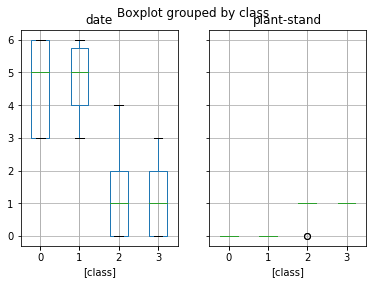

In [121]:
boxplot = soybean_data.boxplot ( column = [ "date", "plant-stand"], by = [ 'class' ] )

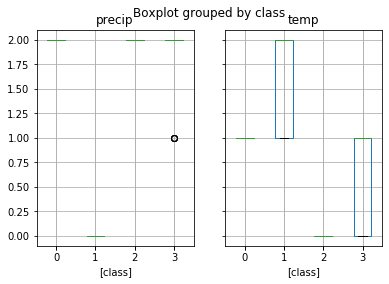

In [122]:
boxplot = soybean_data.boxplot ( column = [ 'precip','temp' ], by = [ 'class' ] )

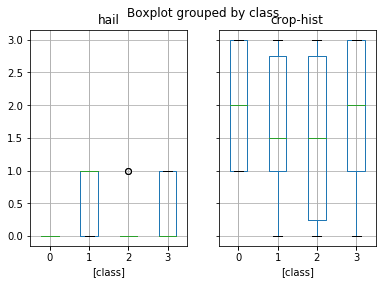

In [123]:
boxplot = soybean_data.boxplot ( column = [ 'hail','crop-hist' ], by = [ 'class' ] )

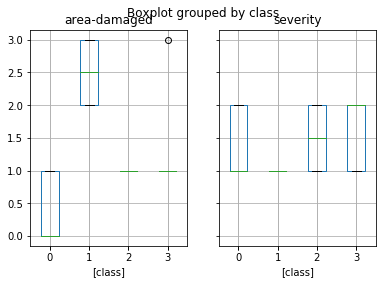

In [124]:
boxplot = soybean_data.boxplot ( column = [ 'area-damaged','severity' ], by = [ 'class' ] )

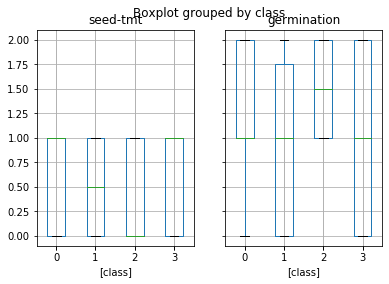

In [125]:
boxplot = soybean_data.boxplot ( column = [ 'seed-tmt','germination' ], by = [ 'class' ] )

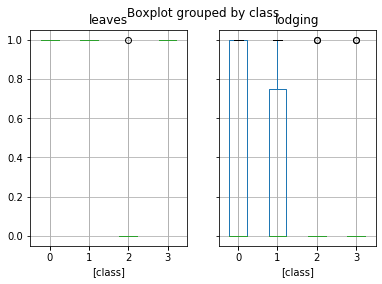

In [126]:
boxplot = soybean_data.boxplot ( column = [ 'leaves','lodging' ], by = [ 'class' ] )

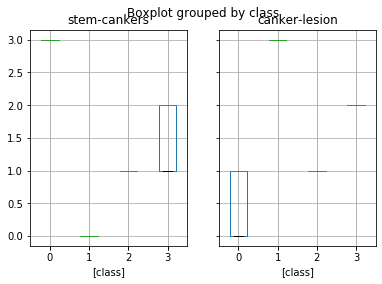

In [127]:
boxplot = soybean_data.boxplot ( column = [ 'stem-cankers','canker-lesion' ], by = [ 'class' ] )

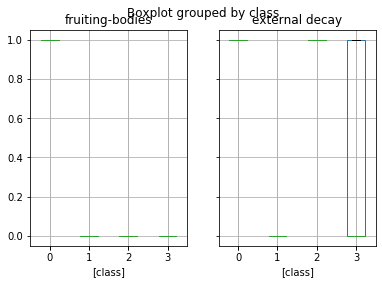

In [128]:
boxplot = soybean_data.boxplot ( column = [ 'fruiting-bodies', 'external decay' ], by = [ 'class' ] )

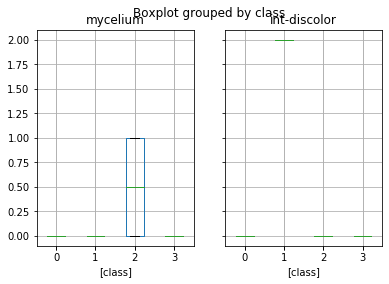

In [129]:
boxplot = soybean_data.boxplot ( column = [ 'mycelium', 'int-discolor' ], by = [ 'class' ] )

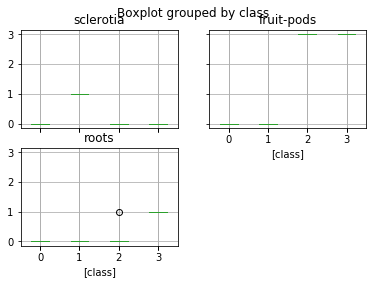

In [130]:
boxplot = soybean_data.boxplot ( column = [ 'sclerotia', 'fruit-pods','roots' ], by = [ 'class' ] )

In [131]:
# Descriptive Statistics: Attribute by Class
# Date by Class
describe_by_category ( soybean_data, "date", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   4.555556   4.700000   1.300000   1.294118
std    1.333333   1.159502   1.494434   1.104802
min    3.000000   3.000000   0.000000   0.000000
25%    3.000000   4.000000   0.000000   0.000000
50%    5.000000   5.000000   1.000000   1.000000
75%    6.000000   5.750000   2.000000   2.000000
max    6.000000   6.000000   4.000000   3.000000


In [132]:
# Descriptive Statistics: Attribute by Class
# Plant-Stand by Class
describe_by_category ( soybean_data, "plant-stand", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.800000   1.0
std    0.0   0.0   0.421637   0.0
min    0.0   0.0   0.000000   1.0
25%    0.0   0.0   1.000000   1.0
50%    0.0   0.0   1.000000   1.0
75%    0.0   0.0   1.000000   1.0
max    0.0   0.0   1.000000   1.0


In [133]:
# Descriptive Statistics: Attribute by Class
# precip by Class
describe_by_category ( soybean_data, "precip", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   2.0   0.0   2.0   1.764706
std    0.0   0.0   0.0   0.437237
min    2.0   0.0   2.0   1.000000
25%    2.0   0.0   2.0   2.000000
50%    2.0   0.0   2.0   2.000000
75%    2.0   0.0   2.0   2.000000
max    2.0   0.0   2.0   2.000000


In [134]:
# Descriptive Statistics: Attribute by Class
# Temp by Class
describe_by_category ( soybean_data, "temp", "class", transpose = True )

class    0          1     2          3
count  9.0  10.000000  10.0  17.000000
mean   1.0   1.600000   0.0   0.588235
std    0.0   0.516398   0.0   0.507300
min    1.0   1.000000   0.0   0.000000
25%    1.0   1.000000   0.0   0.000000
50%    1.0   2.000000   0.0   1.000000
75%    1.0   2.000000   0.0   1.000000
max    1.0   2.000000   0.0   1.000000


In [135]:
# Descriptive Statistics: Attribute by Class
# Hail by Class
describe_by_category ( soybean_data, "hail", "class", transpose = True )

class    0          1          2          3
count  9.0  10.000000  10.000000  17.000000
mean   0.0   0.600000   0.200000   0.352941
std    0.0   0.516398   0.421637   0.492592
min    0.0   0.000000   0.000000   0.000000
25%    0.0   0.000000   0.000000   0.000000
50%    0.0   1.000000   0.000000   0.000000
75%    0.0   1.000000   0.000000   1.000000
max    0.0   1.000000   1.000000   1.000000


In [136]:
# Descriptive Statistics: Attribute by Class
# Crop-Hist by Class
describe_by_category ( soybean_data, "crop-hist", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   2.000000   1.600000   1.500000   1.823529
std    0.866025   1.173788   1.269296   1.074436
min    1.000000   0.000000   0.000000   0.000000
25%    1.000000   1.000000   0.250000   1.000000
50%    2.000000   1.500000   1.500000   2.000000
75%    3.000000   2.750000   2.750000   3.000000
max    3.000000   3.000000   3.000000   3.000000


In [137]:
# Descriptive Statistics: Attribute by Class
# Area-Damaged by Class
describe_by_category ( soybean_data, "area-damaged", "class", transpose = True )

class         0          1     2          3
count  9.000000  10.000000  10.0  17.000000
mean   0.333333   2.500000   1.0   1.117647
std    0.500000   0.527046   0.0   0.485071
min    0.000000   2.000000   1.0   1.000000
25%    0.000000   2.000000   1.0   1.000000
50%    0.000000   2.500000   1.0   1.000000
75%    1.000000   3.000000   1.0   1.000000
max    1.000000   3.000000   1.0   3.000000


In [138]:
# Descriptive Statistics: Attribute by Class
# Severity by Class
describe_by_category ( soybean_data, "severity", "class", transpose = True )

class         0     1          2          3
count  9.000000  10.0  10.000000  17.000000
mean   1.333333   1.0   1.500000   1.647059
std    0.500000   0.0   0.527046   0.492592
min    1.000000   1.0   1.000000   1.000000
25%    1.000000   1.0   1.000000   1.000000
50%    1.000000   1.0   1.500000   2.000000
75%    2.000000   1.0   2.000000   2.000000
max    2.000000   1.0   2.000000   2.000000


In [139]:
# Descriptive Statistics: Attribute by Class
# Seed-tmt by Class
describe_by_category ( soybean_data, "seed-tmt", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   0.555556   0.500000   0.400000   0.529412
std    0.527046   0.527046   0.516398   0.514496
min    0.000000   0.000000   0.000000   0.000000
25%    0.000000   0.000000   0.000000   0.000000
50%    1.000000   0.500000   0.000000   1.000000
75%    1.000000   1.000000   1.000000   1.000000
max    1.000000   1.000000   1.000000   1.000000


In [140]:
# Descriptive Statistics: Attribute by Class
# Germination by Class
describe_by_category ( soybean_data, "germination", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   1.222222   0.900000   1.500000   0.941176
std    0.833333   0.875595   0.527046   0.899346
min    0.000000   0.000000   1.000000   0.000000
25%    1.000000   0.000000   1.000000   0.000000
50%    1.000000   1.000000   1.500000   1.000000
75%    2.000000   1.750000   2.000000   2.000000
max    2.000000   2.000000   2.000000   2.000000


In [141]:
# Descriptive Statistics: Attribute by Class
# Leaves by Class
describe_by_category ( soybean_data, "leaves", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   1.0   1.0   0.100000   1.0
std    0.0   0.0   0.316228   0.0
min    1.0   1.0   0.000000   1.0
25%    1.0   1.0   0.000000   1.0
50%    1.0   1.0   0.000000   1.0
75%    1.0   1.0   0.000000   1.0
max    1.0   1.0   1.000000   1.0


In [142]:
# Descriptive Statistics: Attribute by Class
# Lodging by Class
describe_by_category ( soybean_data, "lodging", "class", transpose = True )

class         0          1          2          3
count  9.000000  10.000000  10.000000  17.000000
mean   0.444444   0.300000   0.200000   0.117647
std    0.527046   0.483046   0.421637   0.332106
min    0.000000   0.000000   0.000000   0.000000
25%    0.000000   0.000000   0.000000   0.000000
50%    0.000000   0.000000   0.000000   0.000000
75%    1.000000   0.750000   0.000000   0.000000
max    1.000000   1.000000   1.000000   1.000000


In [143]:
# Descriptive Statistics: Attribute by Class
# Stem-Cankers by Class
describe_by_category ( soybean_data, "stem-cankers", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   3.0   0.0   1.0   1.529412
std    0.0   0.0   0.0   0.514496
min    3.0   0.0   1.0   1.000000
25%    3.0   0.0   1.0   1.000000
50%    3.0   0.0   1.0   2.000000
75%    3.0   0.0   1.0   2.000000
max    3.0   0.0   1.0   2.000000


In [144]:
# Descriptive Statistics: Attribute by Class
# Canker-lesion by Class
describe_by_category ( soybean_data, "canker-lesion", "class", transpose = True )

class         0     1     2     3
count  9.000000  10.0  10.0  17.0
mean   0.555556   3.0   1.0   2.0
std    0.527046   0.0   0.0   0.0
min    0.000000   3.0   1.0   2.0
25%    0.000000   3.0   1.0   2.0
50%    1.000000   3.0   1.0   2.0
75%    1.000000   3.0   1.0   2.0
max    1.000000   3.0   1.0   2.0


In [145]:
# Descriptive Statistics: Attribute by Class
# Fruiting-bodies by Class
describe_by_category ( soybean_data, "fruiting-bodies", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   1.0   0.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    1.0   0.0   0.0   0.0
25%    1.0   0.0   0.0   0.0
50%    1.0   0.0   0.0   0.0
75%    1.0   0.0   0.0   0.0
max    1.0   0.0   0.0   0.0


In [146]:
# Descriptive Statistics: Attribute by Class
# External decay by Class
describe_by_category ( soybean_data, "external decay", "class", transpose = True )

class    0     1     2          3
count  9.0  10.0  10.0  17.000000
mean   1.0   0.0   1.0   0.352941
std    0.0   0.0   0.0   0.492592
min    1.0   0.0   1.0   0.000000
25%    1.0   0.0   1.0   0.000000
50%    1.0   0.0   1.0   0.000000
75%    1.0   0.0   1.0   1.000000
max    1.0   0.0   1.0   1.000000


In [147]:
# Descriptive Statistics: Attribute by Class
# Mycelium by Class
describe_by_category ( soybean_data, "mycelium", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.500000   0.0
std    0.0   0.0   0.527046   0.0
min    0.0   0.0   0.000000   0.0
25%    0.0   0.0   0.000000   0.0
50%    0.0   0.0   0.500000   0.0
75%    0.0   0.0   1.000000   0.0
max    0.0   0.0   1.000000   0.0


In [148]:
# Descriptive Statistics: Attribute by Class
# int-discolor by Class
describe_by_category ( soybean_data, "int-discolor", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   2.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    0.0   2.0   0.0   0.0
25%    0.0   2.0   0.0   0.0
50%    0.0   2.0   0.0   0.0
75%    0.0   2.0   0.0   0.0
max    0.0   2.0   0.0   0.0


In [149]:
# Descriptive Statistics: Attribute by Class
# Sclerotia by Class
describe_by_category ( soybean_data, "sclerotia", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   1.0   0.0   0.0
std    0.0   0.0   0.0   0.0
min    0.0   1.0   0.0   0.0
25%    0.0   1.0   0.0   0.0
50%    0.0   1.0   0.0   0.0
75%    0.0   1.0   0.0   0.0
max    0.0   1.0   0.0   0.0


In [150]:
# Descriptive Statistics: Attribute by Class
# Fruit-Pods by Class
describe_by_category ( soybean_data, "fruit-pods", "class", transpose = True )

class    0     1     2     3
count  9.0  10.0  10.0  17.0
mean   0.0   0.0   3.0   3.0
std    0.0   0.0   0.0   0.0
min    0.0   0.0   3.0   3.0
25%    0.0   0.0   3.0   3.0
50%    0.0   0.0   3.0   3.0
75%    0.0   0.0   3.0   3.0
max    0.0   0.0   3.0   3.0


In [151]:
# Descriptive Statistics: Attribute by Class
# Roots by Class
describe_by_category ( soybean_data, "roots", "class", transpose = True )

class    0     1          2     3
count  9.0  10.0  10.000000  17.0
mean   0.0   0.0   0.100000   1.0
std    0.0   0.0   0.316228   0.0
min    0.0   0.0   0.000000   1.0
25%    0.0   0.0   0.000000   1.0
50%    0.0   0.0   0.000000   1.0
75%    0.0   0.0   0.000000   1.0
max    0.0   0.0   1.000000   1.0


## Winnow-2: Soybean Data

In [152]:
# Log Experiment: Winnow-2 Soybean Data
logger.info ( "Fitting Winnow2 on Boolean Soybean" )

# Create the model object
# Call Winnow-2 Algorithm
# Initialize alpha (the weight scaler) to 2
# Set the threshold (theta) to 0.5
# Select all features for class
soybean_winnow2 = MulticlassClassifier (
    model_class = Winnow2,
    classes = [ 0, 1, 2, 3 ], # 4 classes
    class_kwargs = {
        cls: {
            "weight_scaler_alpha": 2,
            "threshold_theta": 0.5,
            "number_of_features_d": soybean_bool.drop ( "class", axis = 1 ).shape [ 1 ],
        }
        
        for cls in [ 0, 1, 2, 3 ]
    },
)

# Implement 5 x 2 kfold Cross Validations
# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = soybean_winnow2,
    X = soybean_bool.drop ( "class", axis = 1 ).values,
    y = soybean_bool [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "winnow2-soybean-test.csv",
)

# Naive Bayes: Soybean Data
## Boolean Data

In [153]:
# Log Experiment: Naive Bayes Boolean Soybean Data
logger.info ( "Fitting Naive Bayes on Boolean Soybean" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Boolean Data Set
soybean_naive_bayes_bool = MulticlassClassifier (
    model_class = NaiveBayes,
    classes = [ 0, 1, 2, 3],
    class_kwargs = {
        cls: {
            "column_distribution_map": {
                col: "multinomial" for col in range ( soybean_bool.shape [ 1 ] - 1 )
            },
            "binomial": True,
        }
        for cls in [ 0, 1, 2, 3]
    },
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = soybean_naive_bayes_bool,
    X = soybean_bool.drop ( "class", axis = 1 ).values,
    y = soybean_bool [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-bool-soybean-test.csv",
)

## Naive Bayes: Soybean Data
### Original (Continuous) Data

In [154]:
# Log Experiment: Naive Bayes Continuous Soybean Data
logger.info ( "Fitting Naive Bayes on Continuous Soybean" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Original (Continuous) data
soybean_naive_bayes_continuous = NaiveBayes (
    column_distribution_map = {
        col: "multinomial" for col in range (soybean_data.shape [ 1 ] - 1 )
    }
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = soybean_naive_bayes_continuous,
    X = soybean_data.drop ( "class", axis = 1 ).values,
    y = soybean_data [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-continuous-soybean-test.csv",
)

# House Votes Data Set
## Extract, Transform, Load: House Votes Data

Data obtained from https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

### Attribute Information: 17 Attributes (d)

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

### One Class Label
18. Instance Class

In [155]:
# Log ETL: House Vote Data
logger.info ( "ETL: Vote Data Set" )

# Read House Vote Data
house_votes_data = (
    pd.read_csv(
        "house-votes-84.data.csv",
        header = None,
        # Assign column labels
        names = [
            "class",
            "handicapped-infants",
            "water-project-cost-sharing",
            "adoption-of-the-budget-resolution",
            "physician-fee-freeze",
            "el-salvador-aid",
            "religious-groups-in-schools",
            "anti-satellite-test-ban",
            "aid-to-nicaraguan-contras",
            "mx-missile",
            "immigration",
            "synfuels-corporation-cutback",
            "education-spending",
            "superfund-right-to-sue",
            "crime",
            "duty-free-exports",
            "export-administration-act-south-africa",
        ],
    )
    .replace ( "?", np.NaN )
    .dropna ( axis = 0, how = 'any')
    .replace ( "y", 1 )
    .replace ( "n", 0 )
)

In [156]:
# Confirm column names
list ( house_votes_data.columns )

['class',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [157]:
# Verify whether any values are null
house_votes_data.isnull().values.any()

False

In [158]:
# Again
house_votes_data.isna().any()

class                                     False
handicapped-infants                       False
water-project-cost-sharing                False
adoption-of-the-budget-resolution         False
physician-fee-freeze                      False
el-salvador-aid                           False
religious-groups-in-schools               False
anti-satellite-test-ban                   False
aid-to-nicaraguan-contras                 False
mx-missile                                False
immigration                               False
synfuels-corporation-cutback              False
education-spending                        False
superfund-right-to-sue                    False
crime                                     False
duty-free-exports                         False
export-administration-act-south-africa    False
dtype: bool

**Notes**

We see no NaN instances in any of the attributes or class columns

In [159]:
# Assign class as category
house_votes_data[ "class" ].astype ( "category" ).cat.codes

5      0
8      1
19     0
23     0
25     0
      ..
423    0
426    0
427    1
430    1
431    0
Length: 232, dtype: int8

In [160]:
# Confirm data was properly read by examining data frame
house_votes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
class                                     232 non-null object
handicapped-infants                       232 non-null int64
water-project-cost-sharing                232 non-null int64
adoption-of-the-budget-resolution         232 non-null int64
physician-fee-freeze                      232 non-null int64
el-salvador-aid                           232 non-null int64
religious-groups-in-schools               232 non-null int64
anti-satellite-test-ban                   232 non-null int64
aid-to-nicaraguan-contras                 232 non-null int64
mx-missile                                232 non-null int64
immigration                               232 non-null int64
synfuels-corporation-cutback              232 non-null int64
education-spending                        232 non-null int64
superfund-right-to-sue                    232 non-null int64
crime                                   

**Notes**

We see there are 17 columns (16 attributes; 1 class), 435 entries total and each column has 435 instances (so no missing data). We see that all columns are listed as objects.

In [161]:
# Look at first few rows of dataframe
house_votes_data.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [162]:
# Map 'republican': 1, 'democrat': 0
house_votes_data.replace ( [ 'republican', 'democrat' ], [ 1, 0 ], inplace = True )
house_votes_data.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [163]:
# Make all instances at integer type
house_votes_data.astype ( "int" )

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
426,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
427,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
430,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


In [164]:
# Confirm
house_votes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
class                                     232 non-null int64
handicapped-infants                       232 non-null int64
water-project-cost-sharing                232 non-null int64
adoption-of-the-budget-resolution         232 non-null int64
physician-fee-freeze                      232 non-null int64
el-salvador-aid                           232 non-null int64
religious-groups-in-schools               232 non-null int64
anti-satellite-test-ban                   232 non-null int64
aid-to-nicaraguan-contras                 232 non-null int64
mx-missile                                232 non-null int64
immigration                               232 non-null int64
synfuels-corporation-cutback              232 non-null int64
education-spending                        232 non-null int64
superfund-right-to-sue                    232 non-null int64
crime                                    

In [165]:
# One-hot encoding
house_votes_bool = pd.get_dummies (
    house_votes_data,
    dummy_na = True,
    drop_first = True,
    columns = list ( filter ( lambda c: c != "class", house_votes_data.columns ) ),
)

In [166]:
# Confirm
house_votes_bool.head()

,class,handicapped-infants_1.0,handicapped-infants_nan,water-project-cost-sharing_1.0,water-project-cost-sharing_nan,adoption-of-the-budget-resolution_1.0,adoption-of-the-budget-resolution_nan,physician-fee-freeze_1.0,physician-fee-freeze_nan,el-salvador-aid_1.0,...,education-spending_1.0,education-spending_nan,superfund-right-to-sue_1.0,superfund-right-to-sue_nan,crime_1.0,crime_nan,duty-free-exports_1.0,duty-free-exports_nan,export-administration-act-south-africa_1.0,export-administration-act-south-africa_nan
5,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
8,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
19,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
23,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
25,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## (Brief) Exploratory Data Analysis: House Votes Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [167]:
# Log EDA: House Votes Data
logger.info ( "EDA: House Votes Data Set" )

# Descriptive Statistics
house_votes_data.describe()


,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.465517,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.499888,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Notes**

Total number of observations: 232

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: House Votes Data

### Pair-Wise: Attribute by Class

In [168]:
# Frequency of diagnoses classifications
house_votes_data [ 'class' ].value_counts() # raw counts

0    124
1    108
Name: class, dtype: int64

**Notes*

We observe 124 Republicans and 108 Democrats

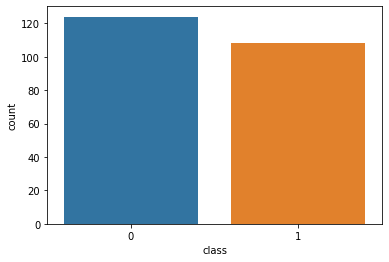

In [169]:
# Plot diagnosos frequencies
sns.countplot ( house_votes_data [ 'class' ],label = "Count" ) # boxplot

In [170]:
# Descriptive Statistics: Count by Class
house_votes_data.groupby ( [ 'class' ] )[ "handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution","physician-fee-freeze","el-salvador-aid","religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras", "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending", "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa",].count()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
class,,,,,,,,,,,,,,,,
0,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124
1,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


## Winnow-2: House Votes Data

In [171]:
# Log Experiment: Winnow-2 House Votes Data
logger.info ( "Fitting Winnow-2 Classifiers to House Votes Data Set" )

# Create the model object
# Call Winnow-2 Algorithm
# Initialize alpha (the weight scaler) to 2
# Set the threshold (theta) to 0.5
# Select all features for class 
house_votes_winnow2 = Winnow2 (
    weight_scaler_alpha = 2, threshold_theta = 0.5, number_of_features_d = house_votes_bool.shape [ 1 ] - 1
)

In [172]:
# Implement 5 x 2 kfold Cross Validations
# Run kfold & evaluate predictions
# Save predictions to csv file

fit_predict_kfold (
    model_object = house_votes_winnow2,
    X = house_votes_bool.drop( "class", axis = 1 ).values,
    y = house_votes_bool [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "winnow2-house-votes-test.csv",
)

# Naive Bayes: House Votes Data
## Boolean Data

In [173]:
# Log Experiment: Naive Bayes Boolean House Votes Data
logger.info ( "Fitting Naive Bayes on Boolean House Votes Data" )

# Create the model object
# Call Naive BayesAlgorithm
# Using Boolean Data Set
house_votes_naive_bayes_boolean = NaiveBayes (
    column_distribution_map = {
        column_index: "multinomial" for column_index in range ( house_votes_bool.shape [ 1 ] - 1 )
    }
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = house_votes_naive_bayes_boolean,
    X = house_votes_bool.drop ( "class", axis = 1 ).values,
    y = house_votes_bool [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-bool-house-votes-test.csv",
)

## Naive Bayes: House Votes Data
### Original (Continuous) Data

In [174]:
# Log Experiment: Naive Bayes Continuous House Votes Data
logger.info ( "Fitting Naive Bayes on Continuous House Votes Data " )

# Create the model object
# Call Naive BayesAlgorithm
# Using Original (Continuous)

house_votes_naive_bayes_continuous = NaiveBayes (
    column_distribution_map = {
        column_index: "multinomial" for column_index in range ( house_votes_data.shape [ 1 ] - 1 )
    }
)

# Run kfold & evaluate predictions
# Save predictions to csv file
fit_predict_kfold (
    model_object = house_votes_naive_bayes_continuous,
    X = house_votes_data.drop ("class", axis = 1 )
        .apply(lambda df: df.astype("category").cat.codes)
        .add(1)
        .values,
    y = house_votes_data [ "class" ].values,
    kfold = kfold,
    randomseed = 682020,
    filename = "naive-bayes-continuous-house-votes-test.csv", 
)